In [1]:
import json
import os
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict, Counter, OrderedDict
from imp import reload
from copy import deepcopy

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

import tarfile
import time

from sklearn.decomposition import PCA


import phenograph

from sklearn.preprocessing import minmax_scale

import re
import warnings

#from kneed import DataGenerator, KneeLocator
from scipy.stats import wasserstein_distance
from scipy.sparse import csr_matrix, find, issparse
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.linalg import eigs

import gseapy
import random

import scanpy as sc
import pandas as pd
import matplotlib
import csv
import time

import os

import scipy
from scipy.stats.stats import pearsonr

In [17]:
d = sc.read_h5ad("tet2_h5files_BM1.h5")

/Users/joyfan/miniconda3/envs/labenv/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/joyfan/miniconda3/envs/labenv/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [2]:
%matplotlib inline

In [12]:
pmap2[23]

'#FF0000'

In [13]:
pmap2[34]

'#BDC6FF'

In [14]:
# Palette for phenograph clusters
pmap2=[ "#010067","#D5FF00","#FF0056","#9E008E","#0E4CA1","#FFE502","#005F39","#00FF00","#95003A","#FF937E",
          "#A42400","#001544","#91D0CB","#620E00","#6B6882","#0000FF","#007DB5","#6A826C","#00AE7E","#C28C9F",
          "#BE9970","#008F9C","#5FAD4E","#BDC6FF","#FF00F6","#FF029D","#683D3B","#FF74A3","#968AE8","#98FF52",
          "#A75740","#01FFFE","#FE8900", "#FFEEE8","#FF0000","#01D0FF","#BB8800","#7544B1","#A5FFD2","#FFA6FE",
          "#774D00","#7A4782","#263400","#004754","#43002C","#B500FF","#FFB167","#FFDB66","#90FB92","#7E2DD2",
          "#BDD393","#E56FFE","#DEFF74","#00FF78","#009BFF","#006401","#0076FF","#85A900","#00B917","#788231",
          "#00FFC6","#FF6E41","#E85EBE"]

# Palette for binary annotations (doublets, mutations, etc)
pmap3 = ['lightgrey', 'red']

# Other
palette ={0:"#010067",1:"#D5FF00",2:"#FF0056",3:"#9E008E", 4:"#0E4CA1", 5:"#FFE502", 
          6:"#005F39", 7:"#00FF00", 8:"#95003A",9:"#FF937E", 10:"#A42400", 
          11:"#001544", 12:"#91D0CB",13:"#620E00",14:"#6B6882",15:"#0000FF",
          16:"#007DB5",17:"#6A826C",18:"#00AE7E",19:"#C28C9F", 20:"#BE9970",
          21:"#008F9C",22:"#5FAD4E",34:"#FF0000", 24:"#FF00F6",25:"#FF029D",
          26:"#683D3B",27:"#FF74A3",28:"#968AE8",29:"#98FF52", 30:"#A75740",
          31:"#01FFFE",32:"#FE8900",33:"#FFEEE8",23:"#BDC6FF",35:"#01D0FF",
          36:"#BB8800",37:"#7544B1",38:"#A5FFD2",39:"#FFA6FE", 40:"#774D00", 
          41:"#7A4782", 42:"#263400", 43:"#004754", 44:"#43002C", 45:"#B500FF"}

pmap4=["#0E4CA1", "#010067",
"#FF74A3","#FF0056", "#9E008E",
"#D5FF00", "#FFE502",
"#91D0CB", "#0000FF","#007DB5",
"#008F9C", "grey"]

pmap5=["#FF0000", "#FF0000",
"grey","#FF0000", "#FF0000",
"grey", "grey",
"grey", "#FF0000","#FF0000",
"#FF0000", "#FF0000"]


palette_fab = {'AML-M0': 'M0','AML-M1' : 'M1','AML-M2' : 'M2',
               'AML-M2 ': 'M2', 'AML-M3' : 'M3', 'AML-M3V': 'M3',
               'AML-M4' : 'M4', 'AML-M4Eo' : 'M4',
               'AML-M5' : 'M5','AML-M5A': 'M5','AML-M5B': 'M5', 
               'AML-M6': 'M6','AML-M6A': 'M6','AML-M6B': 'M6','AML-M7' : 'M7',
               'AREB-T': 'other','Not classifiable by FAB criteria': 'other'}


palette_sample = {'07H158': '#0E4CA1',
 '08H043': '#010067',
 '08H063': '#FF74A3',
 '08H089': '#FF0056',
 '10H072': '#9E008E',
 '12H058': '#D5FF00',
 '13H006': '#FFE502',
 '13H080': '#91D0CB',
 '15H044': '#0000FF',
 '16H008': '#007DB5',
 '16H123': '#008F9C',
 'AML7': 'grey'}

palette_fab2 = {'07H158': '#66CCCC',
 '08H043': '#66CCCC',
 '08H063': '#CC6699',
 '08H089': '#CC6699',
 '10H072': '#CC6699',
 '12H058': '#CC6600',
 '13H006': '#CC6600',
 '13H080': '#66CCCC',
 '15H044': '#66CCCC',
 '16H008': '#66CCCC',
 '16H123': '#66CCCC',
 'AML7': 'silver'}


palette_mut = {'07H158': '#010067',
 '08H043': '#010067',
 '08H063': 'silver',
 '08H089': '#010067',
 '10H072': '#010067',
 '12H058': 'silver',
 '13H006': 'silver',
 '13H080': 'silver',
 '15H044': '#010067',
 '16H008': '#010067',
 '16H123': '#010067',
 'AML7': '#010067'}



In [4]:
SAMPLE = 'all_samples_to_use'

path_h5 = '/Users/vincentlavallee/data/SKI/AnacondaProjects/AML/h5_AMLpaper/'

In [5]:
adata_raw = sc.read_h5ad(SAMPLE + '.h5')
print(adata_raw.shape)
adata_raw.to_df().head(5)

/Users/joyfan/miniconda3/envs/labenv/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/Users/joyfan/miniconda3/envs/labenv/lib/python3.6/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


(104116, 22354)


index,TSPAN6,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,DIO1,HMP19,PRKAA2,GOLGA8F,ASCL4,RIPPLY1,LINC00658,PRSS50,OR51I1,RP11-123O10.3
index,,,,,,,,,,,,,,,,,,,,,
204911389031725_13H006_1,0.0,3.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226901487380891_08H043_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191080743484644_13H006_1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205527670798637_15H044_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134600627504877_12H058_2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
adata = adata_raw.copy()

# Normalize by median library size
med = np.median(adata.obs['original_total_counts'])
sc.pp.normalize_per_cell(adata, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(adata)

adata.to_df().head(5)

index,TSPAN6,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,DIO1,HMP19,PRKAA2,GOLGA8F,ASCL4,RIPPLY1,LINC00658,PRSS50,OR51I1,RP11-123O10.3
index,,,,,,,,,,,,,,,,,,,,,
204911389031725_13H006_1,0.0,0.880620,0.0,0.0,0.880620,0.0,0.385805,0.385805,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226901487380891_08H043_1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191080743484644_13H006_1,0.0,0.379781,0.0,0.0,0.000000,0.0,0.654369,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205527670798637_15H044_1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134600627504877_12H058_2,0.0,0.000000,0.0,0.0,2.141359,0.0,0.000000,0.000000,1.253809,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Additional annotations
# Combine pair together such that it does not inflate the diversity

ls = list(adata.obs.PhenoGraph_clusters)
ls2 = ['blast1' if x in [0,7,19,33,39,2,21,8,38,22,6,17,16,4,25] else x for x in ls]
ls3 = ['blast2' if x in [35,10,13,9,20,14,15,24] else x for x in ls2]
ls4 = ['blast3' if x in [3,5,12,29,1,27,18,32,37,28,31] else x for x in ls3]
ls5 = ['ery' if x in [23] else x for x in ls4]
ls6 = ['immature' if x in [34] else x for x in ls5]
ls7 = ['b' if x in [26] else x for x in ls6]
ls8 = ['t' if x in [36,11,30] else x for x in ls7]

adata.obs['blast_cell_type'] = ls8


In [8]:
# Combine pair together such that it does not inflate the diversity
ls = list(adata.obs.sample_short)
ls2 = ['mutated' if x in ['08H089', '10H072', 'AML7', '07H158',
                          '08H043', '16H123', '15H044', '16H008'] else x for x in ls]
ls3 = ['wildtype' if x in ['08H063', '12H058', '13H006', '13H080'] else x for x in ls2]

adata.obs['bulk_mutation'] = ls3

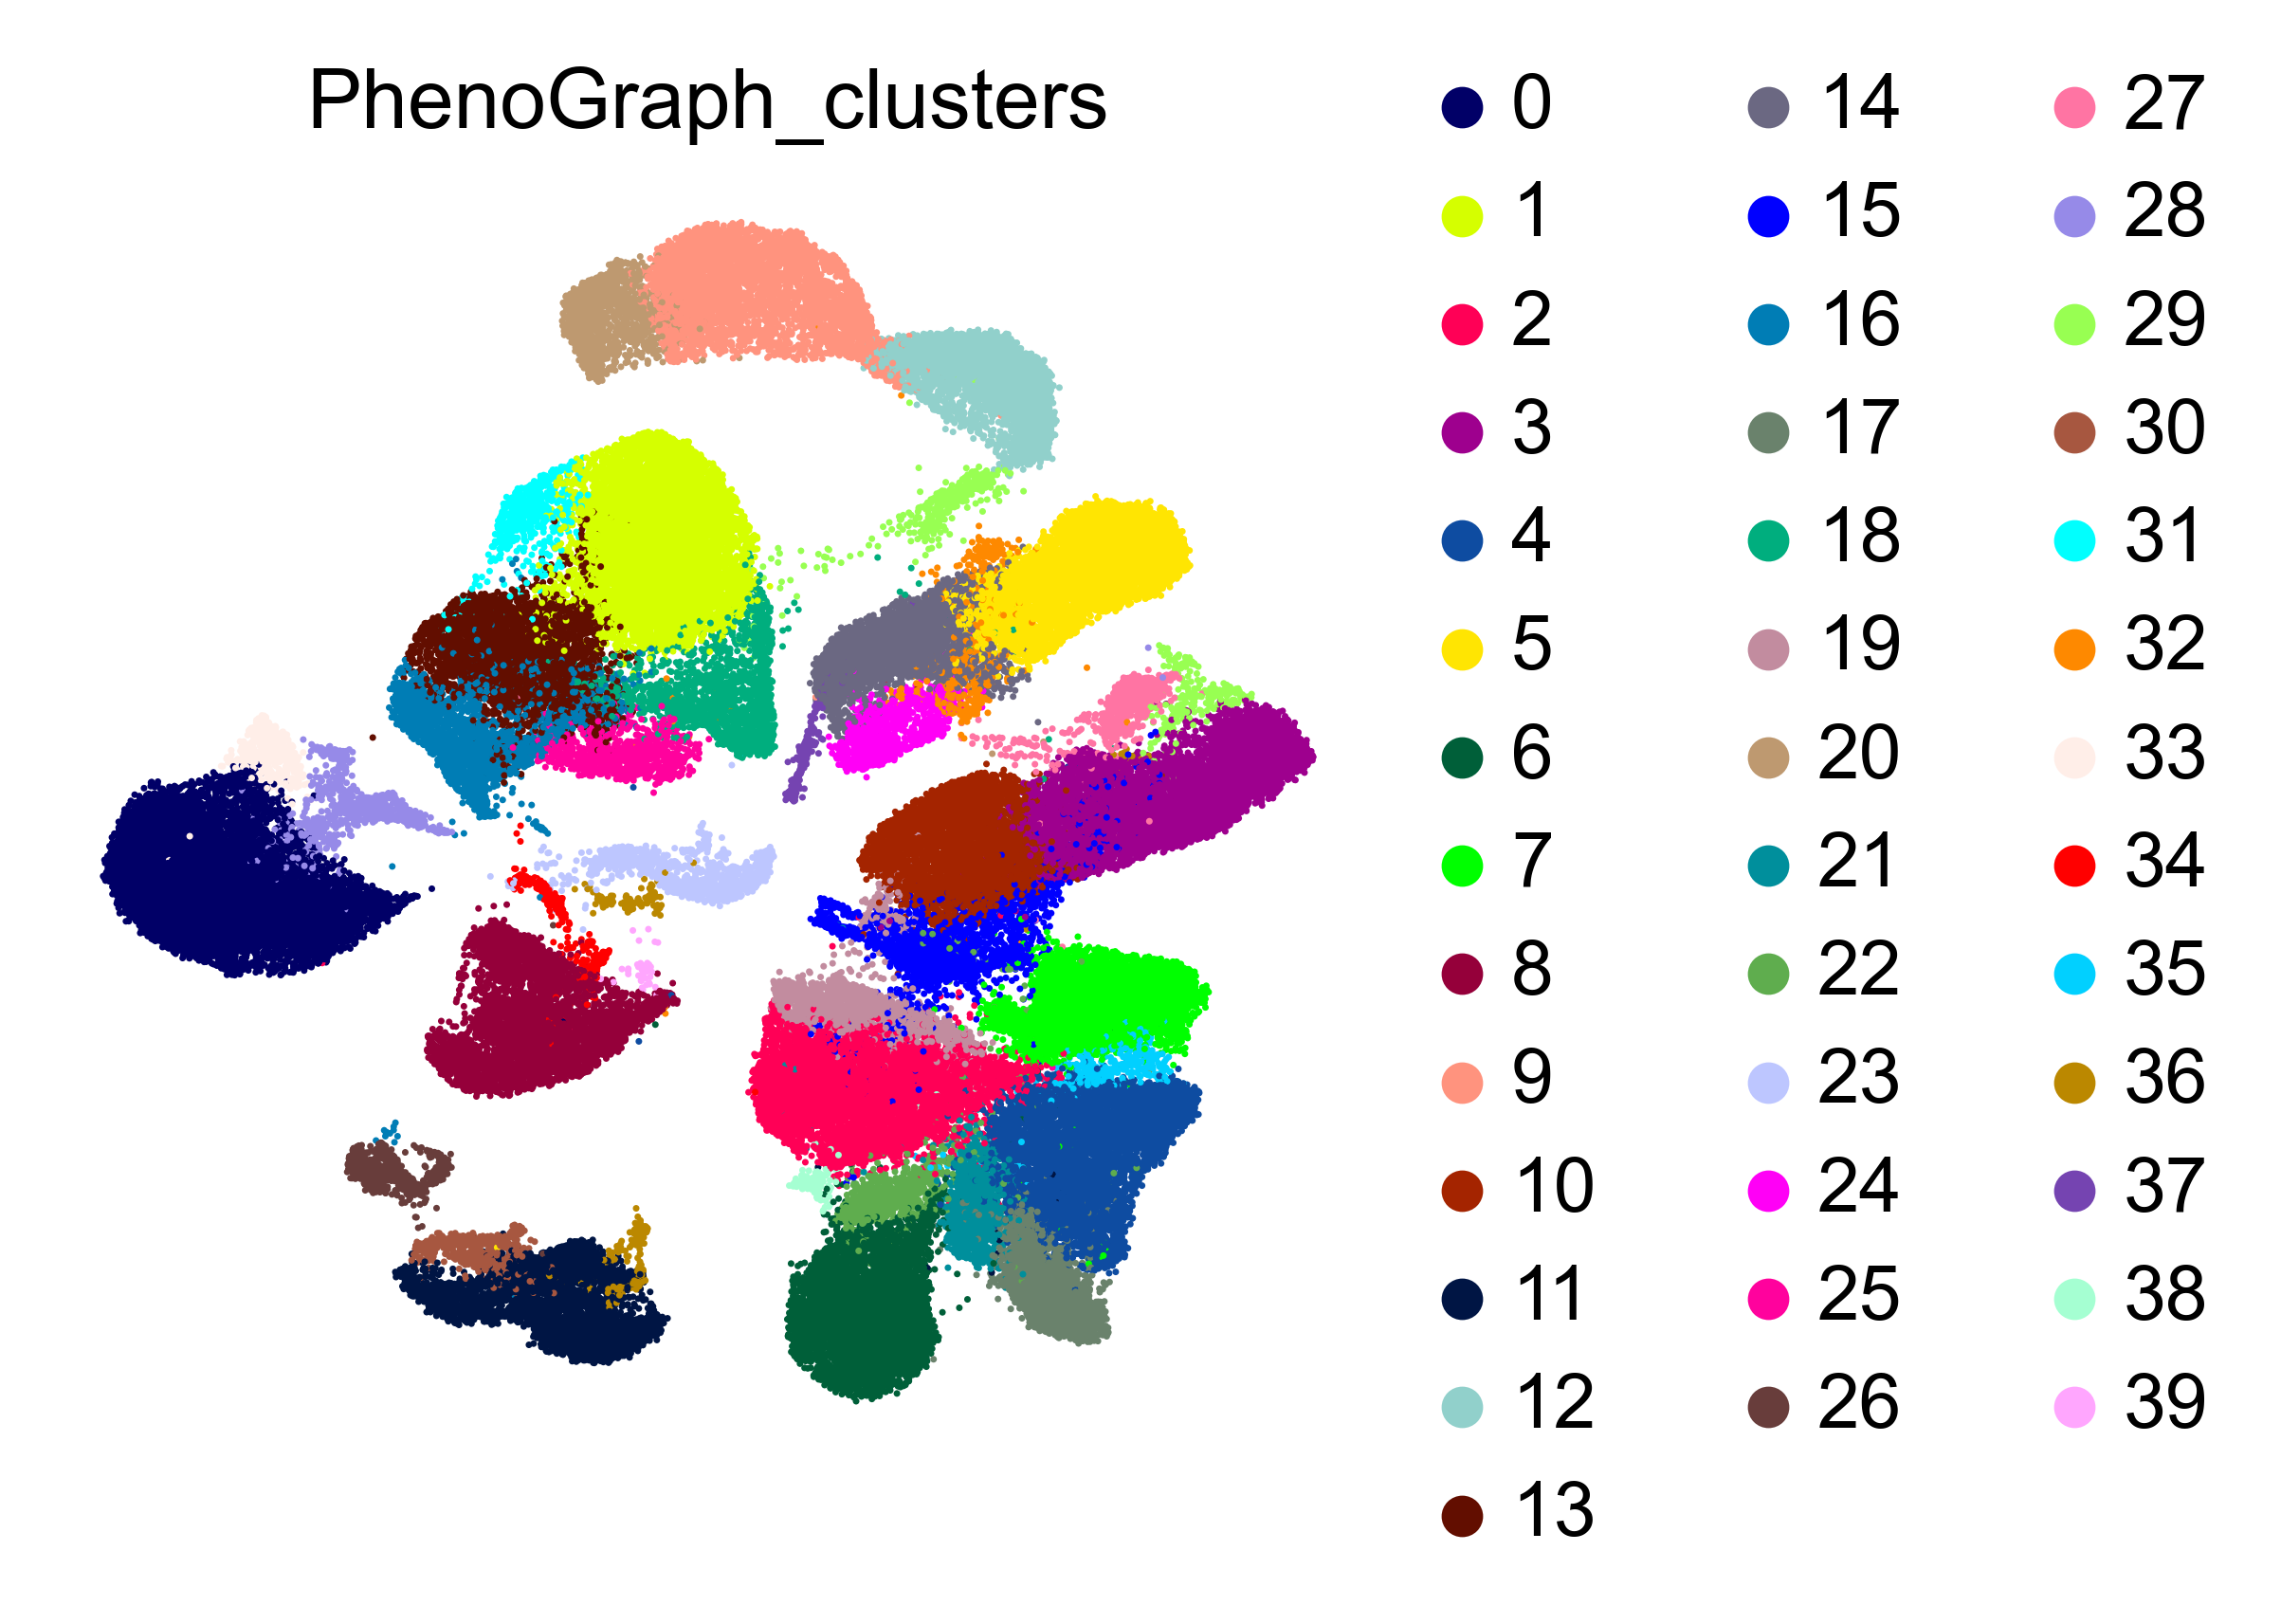

In [15]:
sc.set_figure_params(dpi=450, frameon = None, dpi_save=450)

sc.pl.umap(
    adata, 
    color=['PhenoGraph_clusters',],#,'mito_frac', 'log10_original_total_counts', 'sample', 'phase'],
    palette= pmap2, 
    color_map='Spectral_r', 
    s=5,
    ncols = 1,
    save='12samples_clusters.pdf', 
)

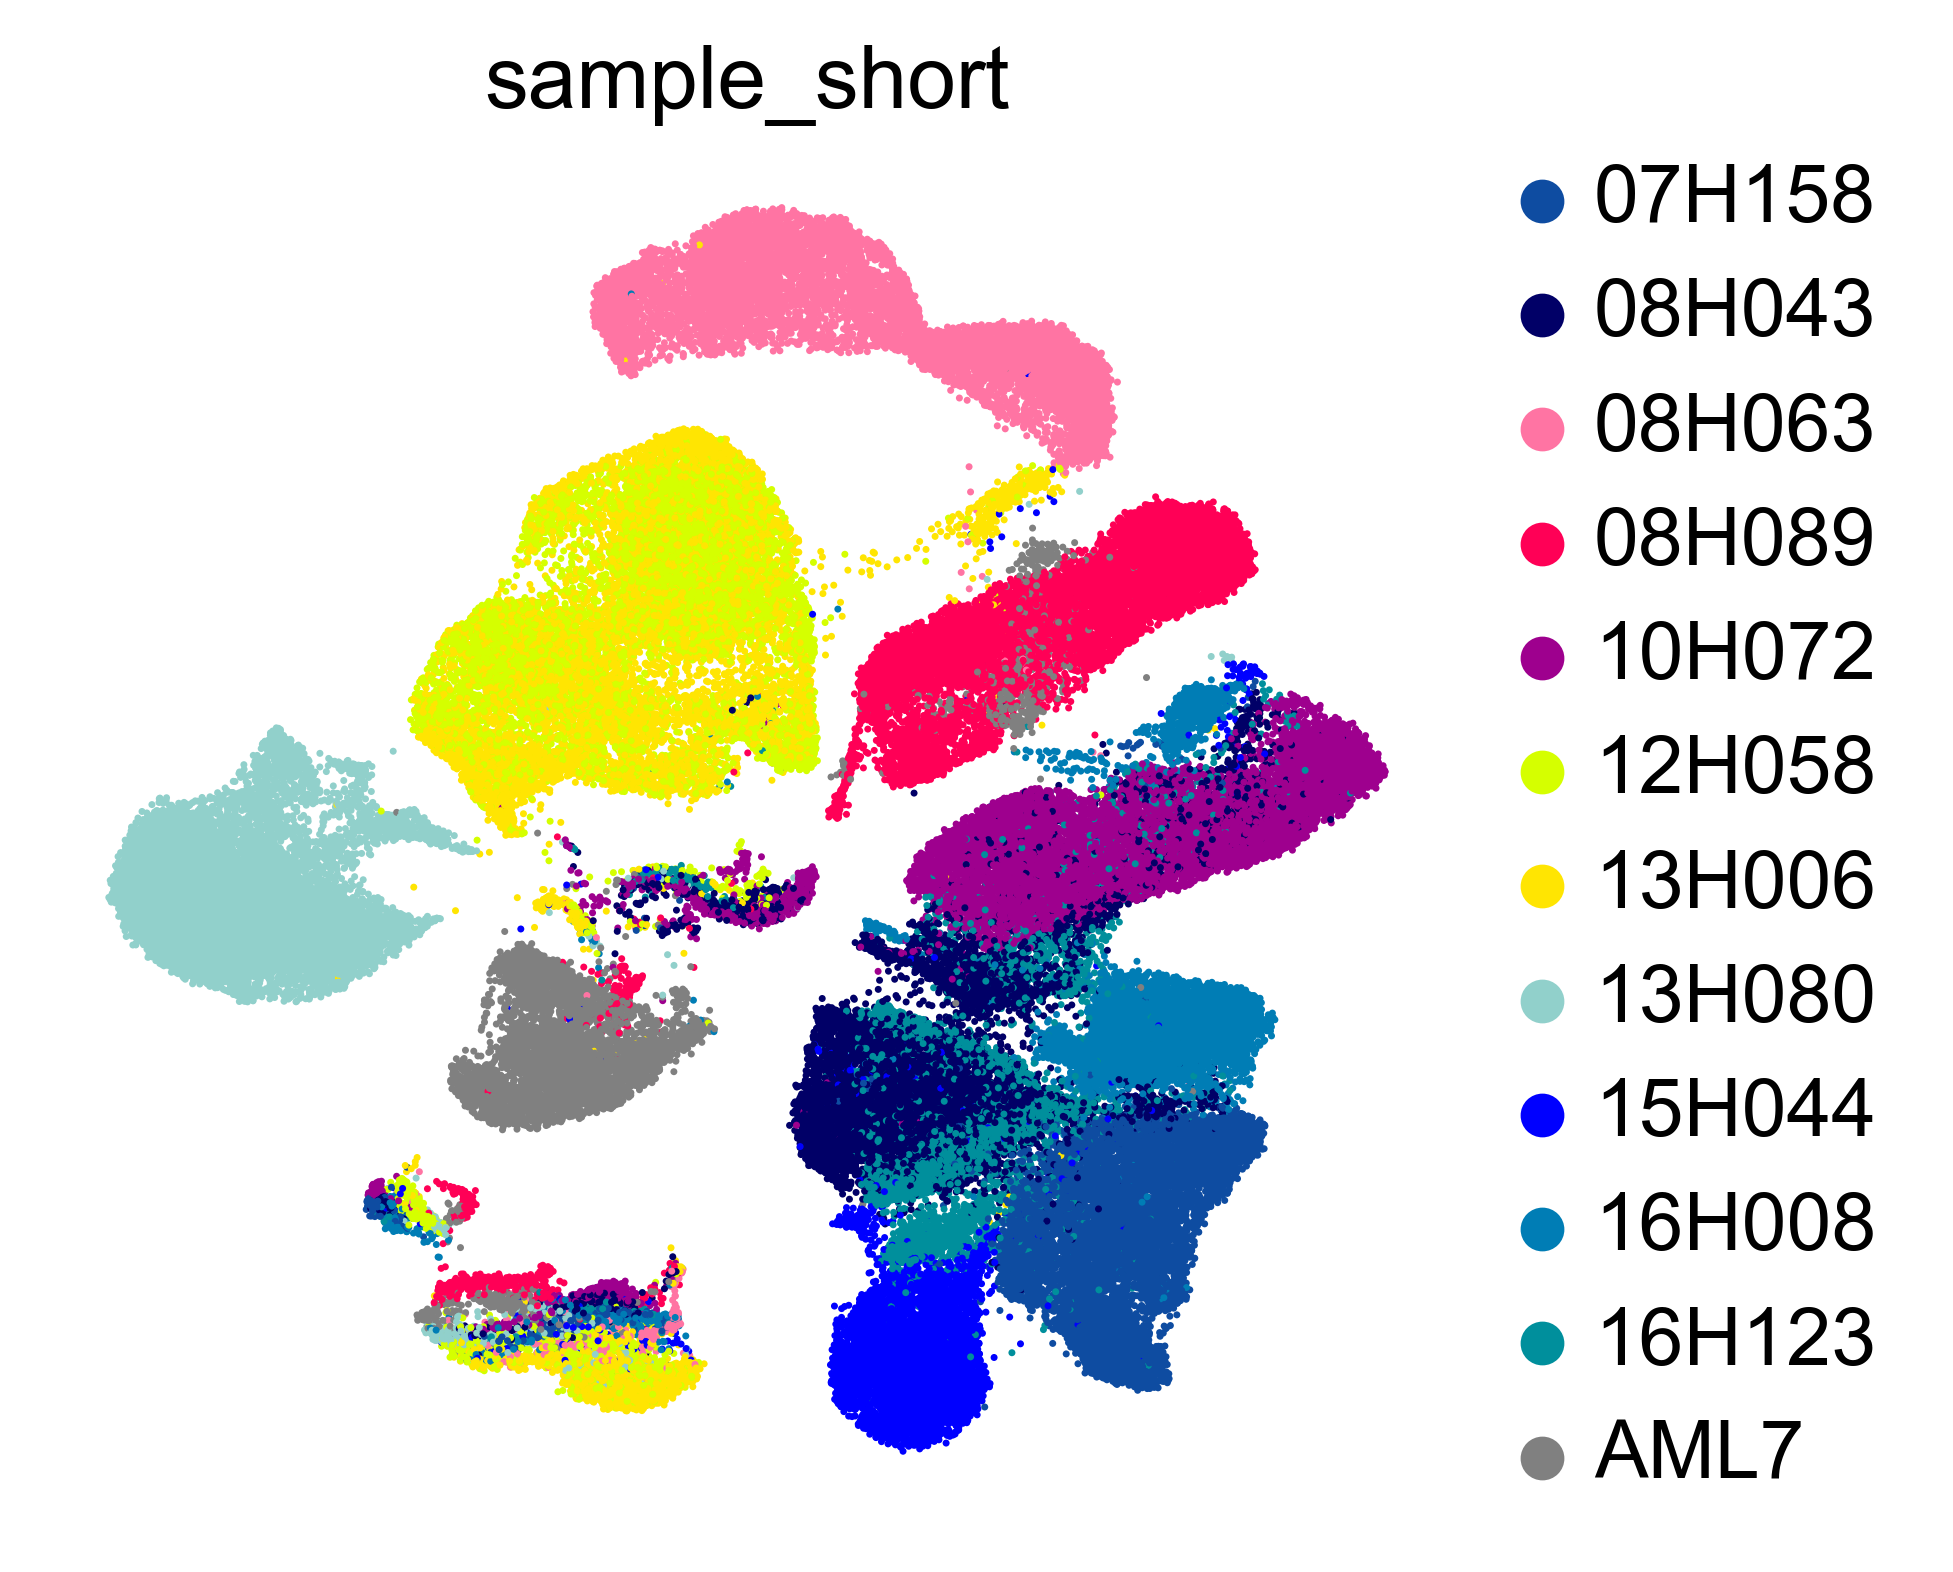

In [12]:
sc.set_figure_params(dpi=450, frameon = None, dpi_save=450)

sc.pl.umap(
    adata, 
    color=['sample_short',],#,'mito_frac', 'log10_original_total_counts', 'sample', 'phase'],
    palette= palette_sample, 
    color_map='Spectral_r', 
    s=5,
    ncols = 1,
    #save='12samples_sample.pdf', 
)


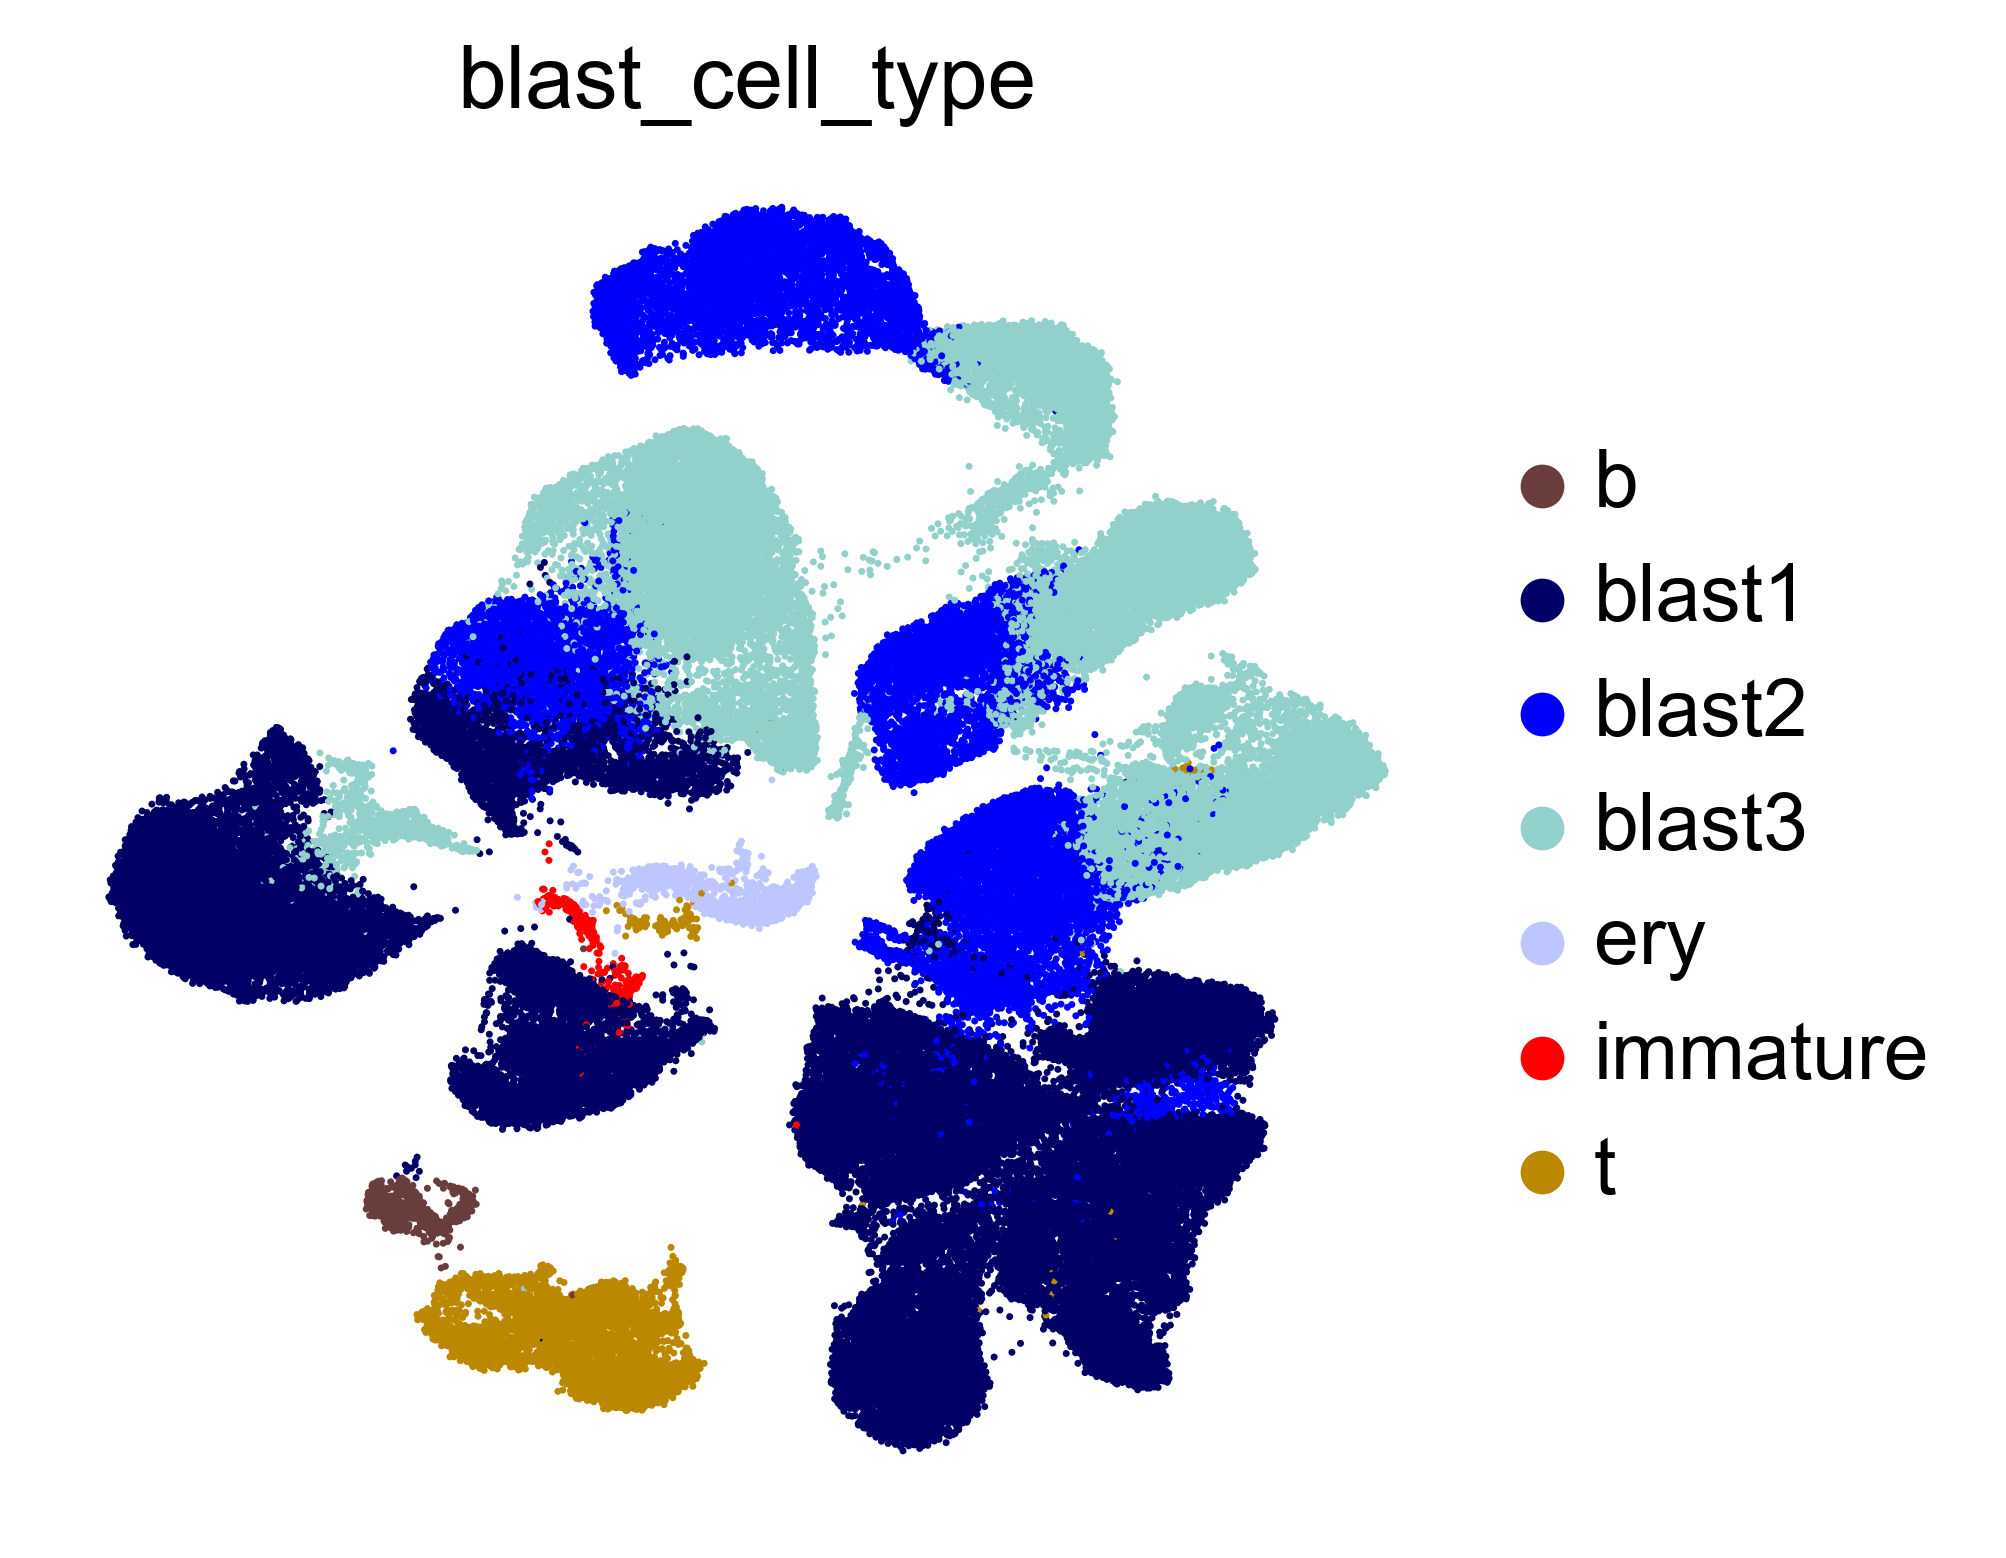

In [14]:
sc.set_figure_params(dpi=450, frameon = None, dpi_save=450)

palette_celltype = {'b': "#683D3B",
                   'blast1': "#010067",
                   'blast2': "#0000FF",
                   'blast3': "#91D0CB",
                   'ery': "#BDC6FF",
                   'immature': "#FF0000",
                   't': "#BB8800",}

sc.pl.umap(
    adata, 
    color=['blast_cell_type',],#,'mito_frac', 'log10_original_total_counts', 'sample', 'phase'],
    palette= palette_celltype, 
    color_map='Spectral_r', 
    s=5,
    ncols = 1,
    save='12samples_celltype.pdf', 
)

In [12]:
ls = list(adata.obs.sample_short)
ls2 = ['mutated' if x in ['08H089', '10H072', 'AML7', '07H158',
                          '08H043', '16H123', '15H044', '16H008'] else x for x in ls]
ls3 = ['wildtype' if x in ['08H063', '12H058', '13H006', '13H080'] else x for x in ls2]

adata.obs['bulk_mutation'] = ls3

/Users/vincentlavallee/venv/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'bulk_mutation' as categorical


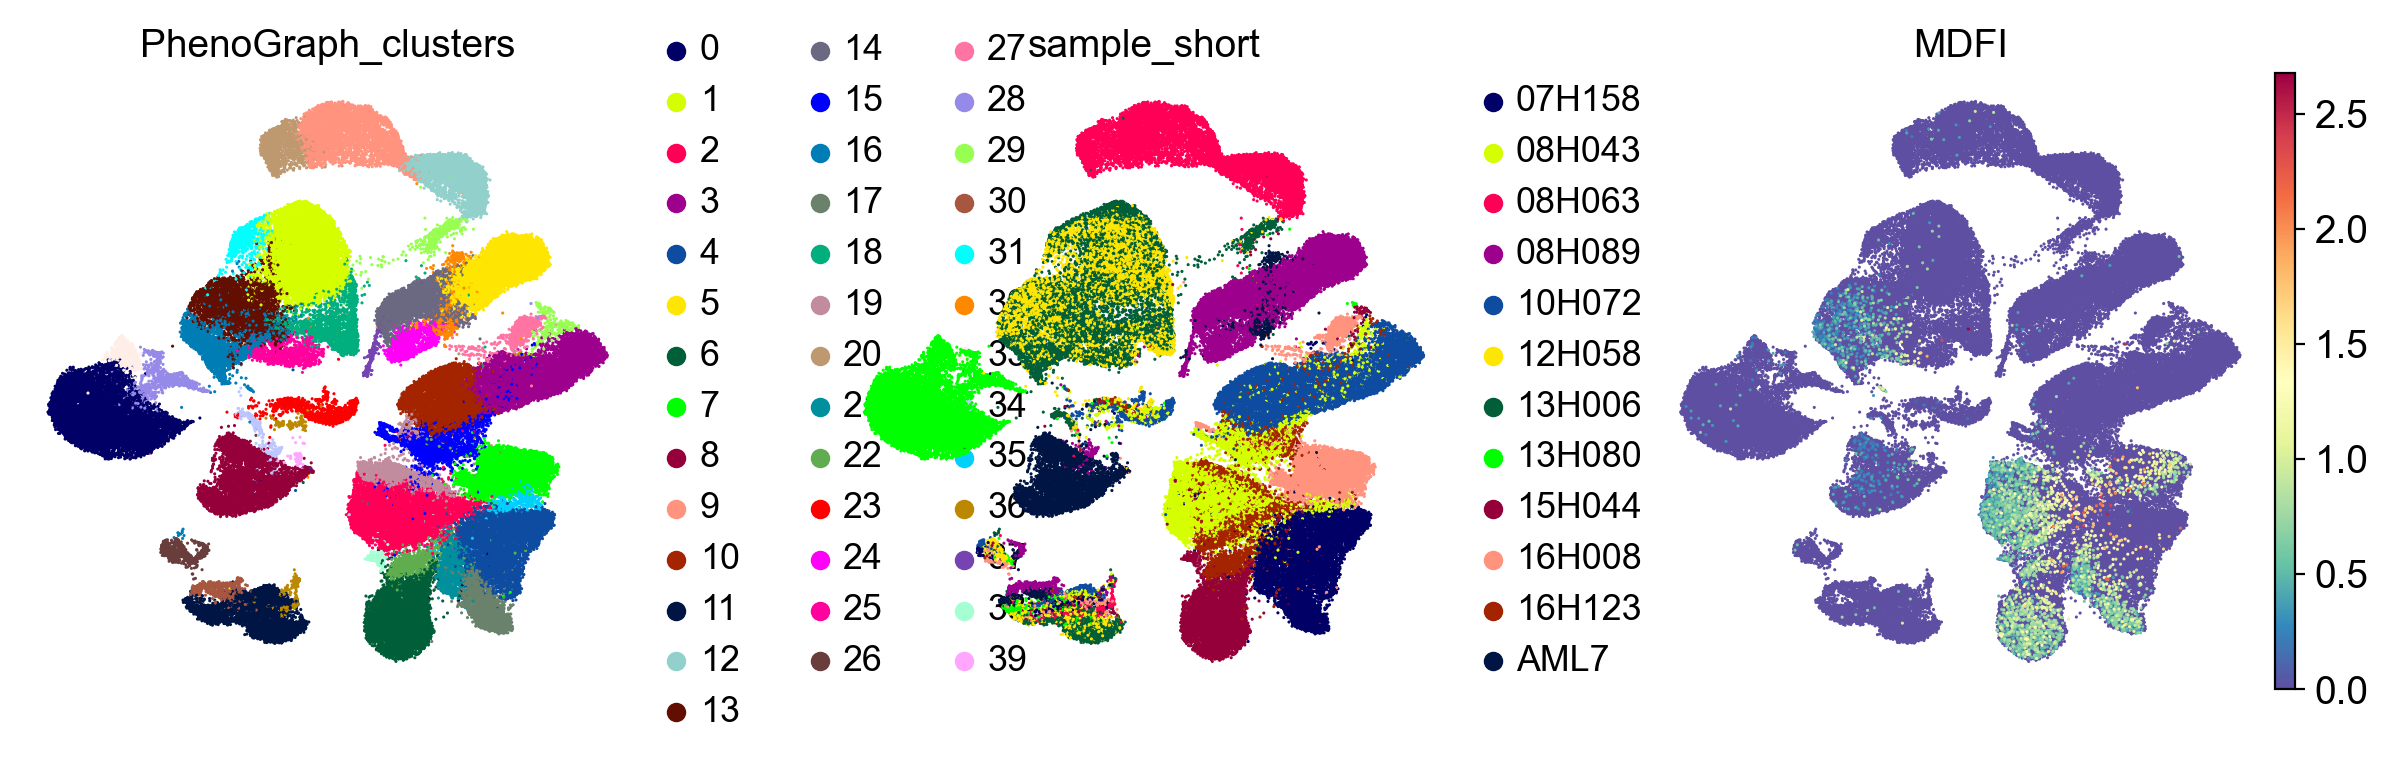

In [13]:
sc.set_figure_params(dpi=100, frameon = None)
sc.pl.umap(
    adata, 
    color=['PhenoGraph_clusters', 'sample_short', 'MDFI'],#,'mito_frac', 'log10_original_total_counts', 'sample', 'phase'],
    palette= pmap2, 
    color_map='Spectral_r', 
    #edges = True, edges_width = 0.025,
    s=5
)

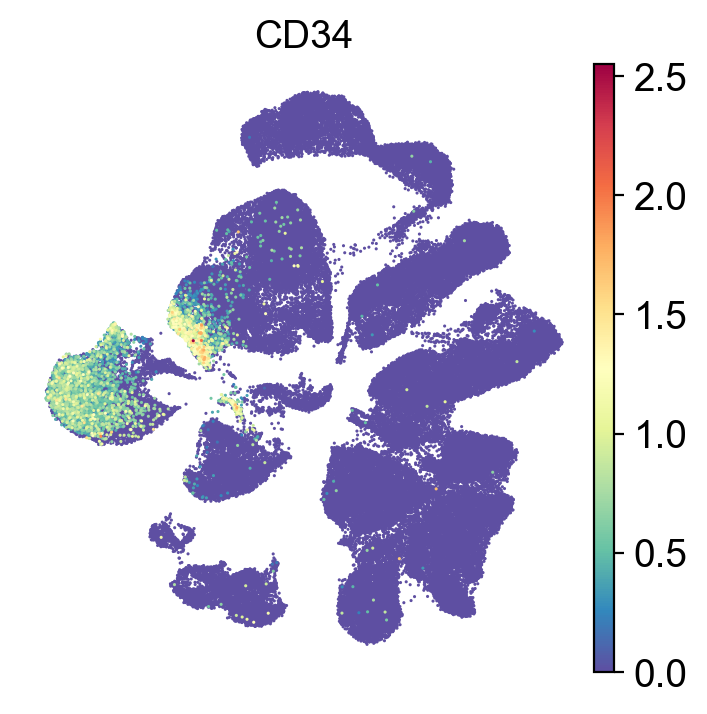

In [14]:
sc.set_figure_params(dpi=100, frameon = None)
sc.pl.umap(
    adata, 
    color=['CD34'],#,'mito_frac', 'log10_original_total_counts', 'sample', 'phase'],
    palette= pmap2, 
    color_map='Spectral_r', 
    #edges = True, edges_width = 0.025,
    s=5
)

### Correlation with bulk sequencing

#### Per cell type

In [15]:
# Select most variable genes
adata_df = adata.to_df()

In [16]:
genes_std = np.std(adata_df, axis=0)

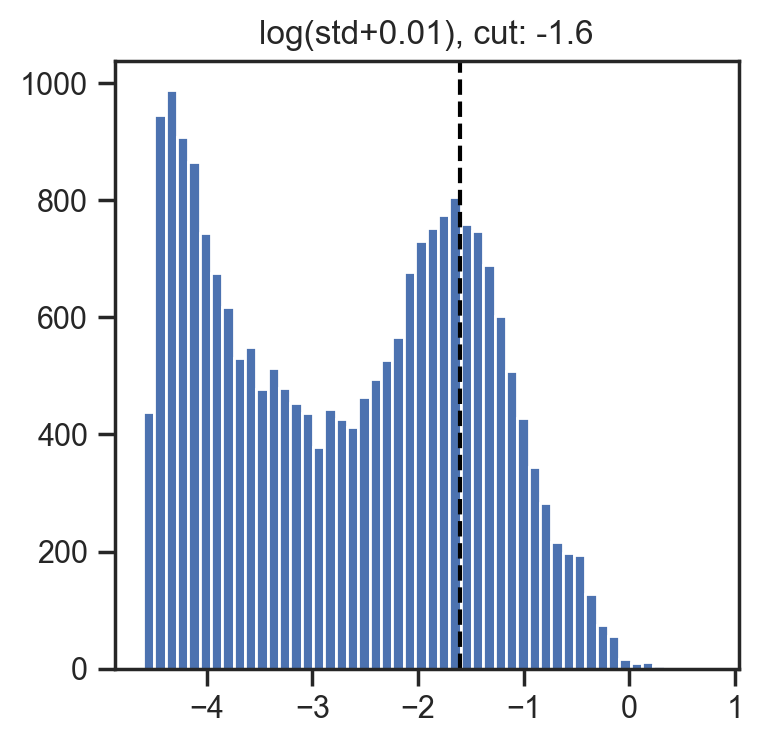

In [17]:
sns.set(font_scale=1)
sns.set_style('ticks')


cut_off = -1.6

plt.hist(np.log(genes_std+0.01), bins = 50)
plt.title('log(std+0.01), cut: ' + str(cut_off))
plt.axvline(x=cut_off, c = 'black', linestyle='--' )




In [18]:
adata_df_red = adata_df.loc[:,np.log(genes_std+0.01) > cut_off]
adata_df_red.index = adata.obs['sample_short']
adata_df_red.head(5)

sc = adata_df_red.copy()
# group by cluster mean
sc_forcomp = sc.groupby(level=0, axis=0).mean()

#Center
sc_forcomp -= sc_forcomp.mean(axis=0)

In [19]:
# DMAP

dmap = pd.read_table('/Users/vincentlavallee/data/SKI/AnacondaProjects/Lung/DMap_data.gct', skiprows=2, parse_dates=False, index_col=[0, 1]).T
dmap.columns = dmap.columns.droplevel(0)
dmap.index = [re.sub('_\d{1,2}', '', i) for i in dmap.index]
dmap = dmap.groupby(level=0, axis=0).mean()
dmap = dmap.drop([ 'DENDA1', 'MEGA1', 'PRE_BCELL2', 'PRE_BCELL3',
                 
                  # ADDITIONAL POPULATIONS TO REMOVE FOR THE SAMPLE LEVEL
                  
                  'NKA1', 'TCELLA2', 'TCELLA6', 'ERY2', 'ERY3', 'ERY4', 'ERY5', 
                  'BCELLA1', 'BCELLA2', 'TCELLA8', 'TCELLA4', 
                  'TCELLA7', 'BCELLA3', 'TCELLA1', 'NKA4', 'BCELLA4', 'TCELLA3', 'NKA2', 'NKA3'
 ])

In [20]:
pval = 0.0005

print("step 1, dmap")

dmap = dmap.groupby(level=0, axis=1).mean() 
expressed = sc_forcomp.columns.intersection(dmap.columns)

a = sc_forcomp[expressed]
b = dmap[expressed]


co_df = pd.DataFrame(index = sc_forcomp.index, 
                     columns = dmap.index)

pv_df = pd.DataFrame(index = sc_forcomp.index, 
                     columns = dmap.index)

# Calculate correlations and p-values
print("step 1.A")
for i in range(0,sc_forcomp.shape[0]):
    for j in range (0, dmap.shape[0]):
        co,pv = scipy.stats.pearsonr(a.iloc[i,:],b.iloc[j,:])
        co_df.iloc[i,j] = co
        pv_df.iloc[i,j] = pv

# Keep only correlations with significant p-values:
print("step 1.B")
for i in range(0,sc_forcomp.shape[0]):
    for j in range (0, dmap.shape[0]):
        if pv_df.iloc[i,j] > pval:
            co_df.iloc[i,j] = 0        
      
pv_df_dmap =  pv_df.copy()  
co_df_dmap =  co_df.copy()  
    


step 1, dmap
step 1.A
step 1.B


(12, 3475)


[Text(0.5, 0, 'DENDA2'),
 Text(1.5, 0, 'MONO2'),
 Text(2.5, 0, 'MONO1'),
 Text(3.5, 0, 'GRAN2'),
 Text(4.5, 0, 'GRAN3'),
 Text(5.5, 0, 'EOS2'),
 Text(6.5, 0, 'BASO1'),
 Text(7.5, 0, 'GMP'),
 Text(8.5, 0, 'MEGA2'),
 Text(9.5, 0, 'HSC3'),
 Text(10.5, 0, 'HSC1'),
 Text(11.5, 0, 'ERY1'),
 Text(12.5, 0, 'MEP'),
 Text(13.5, 0, 'CMP'),
 Text(14.5, 0, 'GRAN1')]

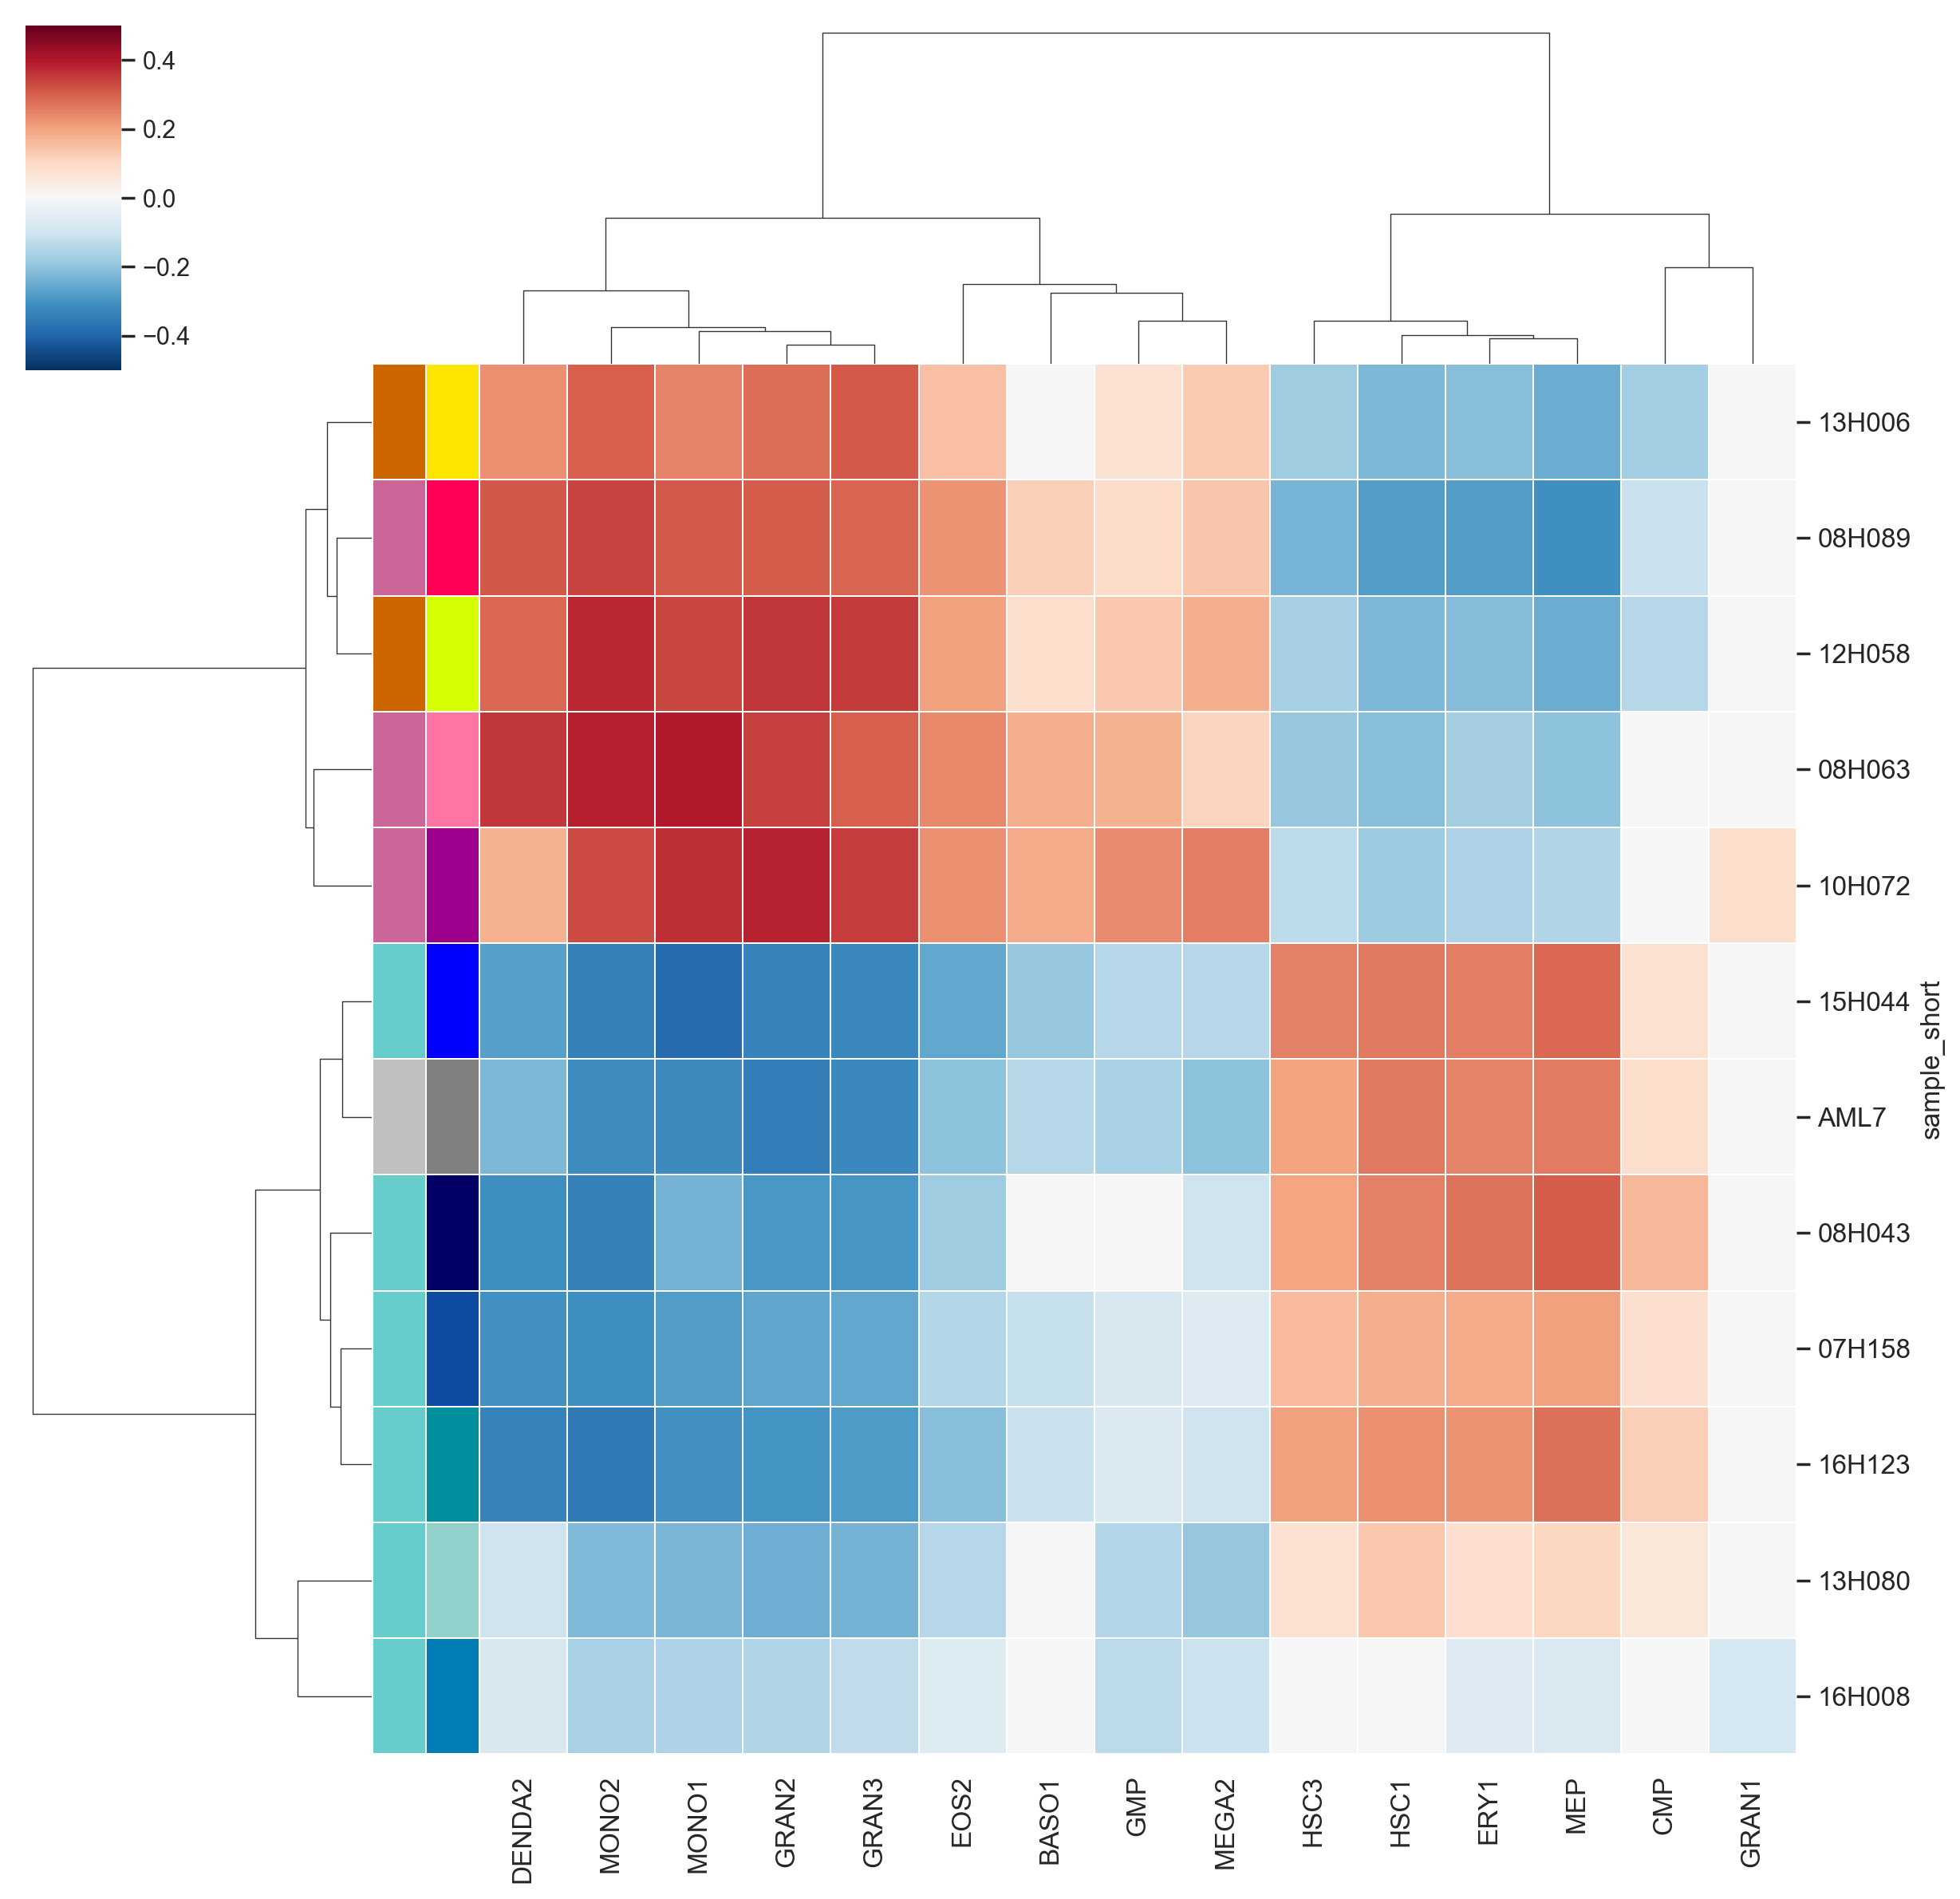

In [21]:
sns.set(font_scale=1)


pmap6=['#66CCCC', '#66CCCC',
 '#CC6699', '#CC6699', '#CC6699', 
       '#CC6600', '#CC6600',
       
 '#66CCCC', '#66CCCC', '#66CCCC', '#66CCCC', 'silver']

print(a.shape)

corrs = co_df_dmap.copy()


lut = dict(zip(corrs.index, pmap4))
col = pd.DataFrame(list(corrs.index), columns = ['community'])
col.index = col['community']
row_colors = col.community.map(lut)

lut2 = dict(zip(corrs.index, pmap6))
col2 = pd.DataFrame(list(corrs.index), columns = ['community'])
col2.index = col2['community']
row_colors2 = col2.community.map(lut2)




# Do not display unwanted values
# Convert to float
corrs_red = corrs.copy()
corrs_red = corrs_red.astype('float64') 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
cm = sns.clustermap(corrs_red, figsize=(12, 12), cmap = 'RdBu_r', 
                    row_colors = [row_colors2, row_colors],
                   vmin = -0.5, vmax = 0.5,
                    linewidths=0.05
                   )

ax = cm.ax_heatmap
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)



(12, 3475)


[Text(0.5, 0, 'DENDA2'),
 Text(1.5, 0, 'MONO2'),
 Text(2.5, 0, 'MONO1'),
 Text(3.5, 0, 'GRAN2'),
 Text(4.5, 0, 'GRAN3'),
 Text(5.5, 0, 'EOS2'),
 Text(6.5, 0, 'BASO1'),
 Text(7.5, 0, 'GMP'),
 Text(8.5, 0, 'MEGA2'),
 Text(9.5, 0, 'HSC3'),
 Text(10.5, 0, 'HSC1'),
 Text(11.5, 0, 'ERY1'),
 Text(12.5, 0, 'MEP'),
 Text(13.5, 0, 'CMP'),
 Text(14.5, 0, 'GRAN1')]

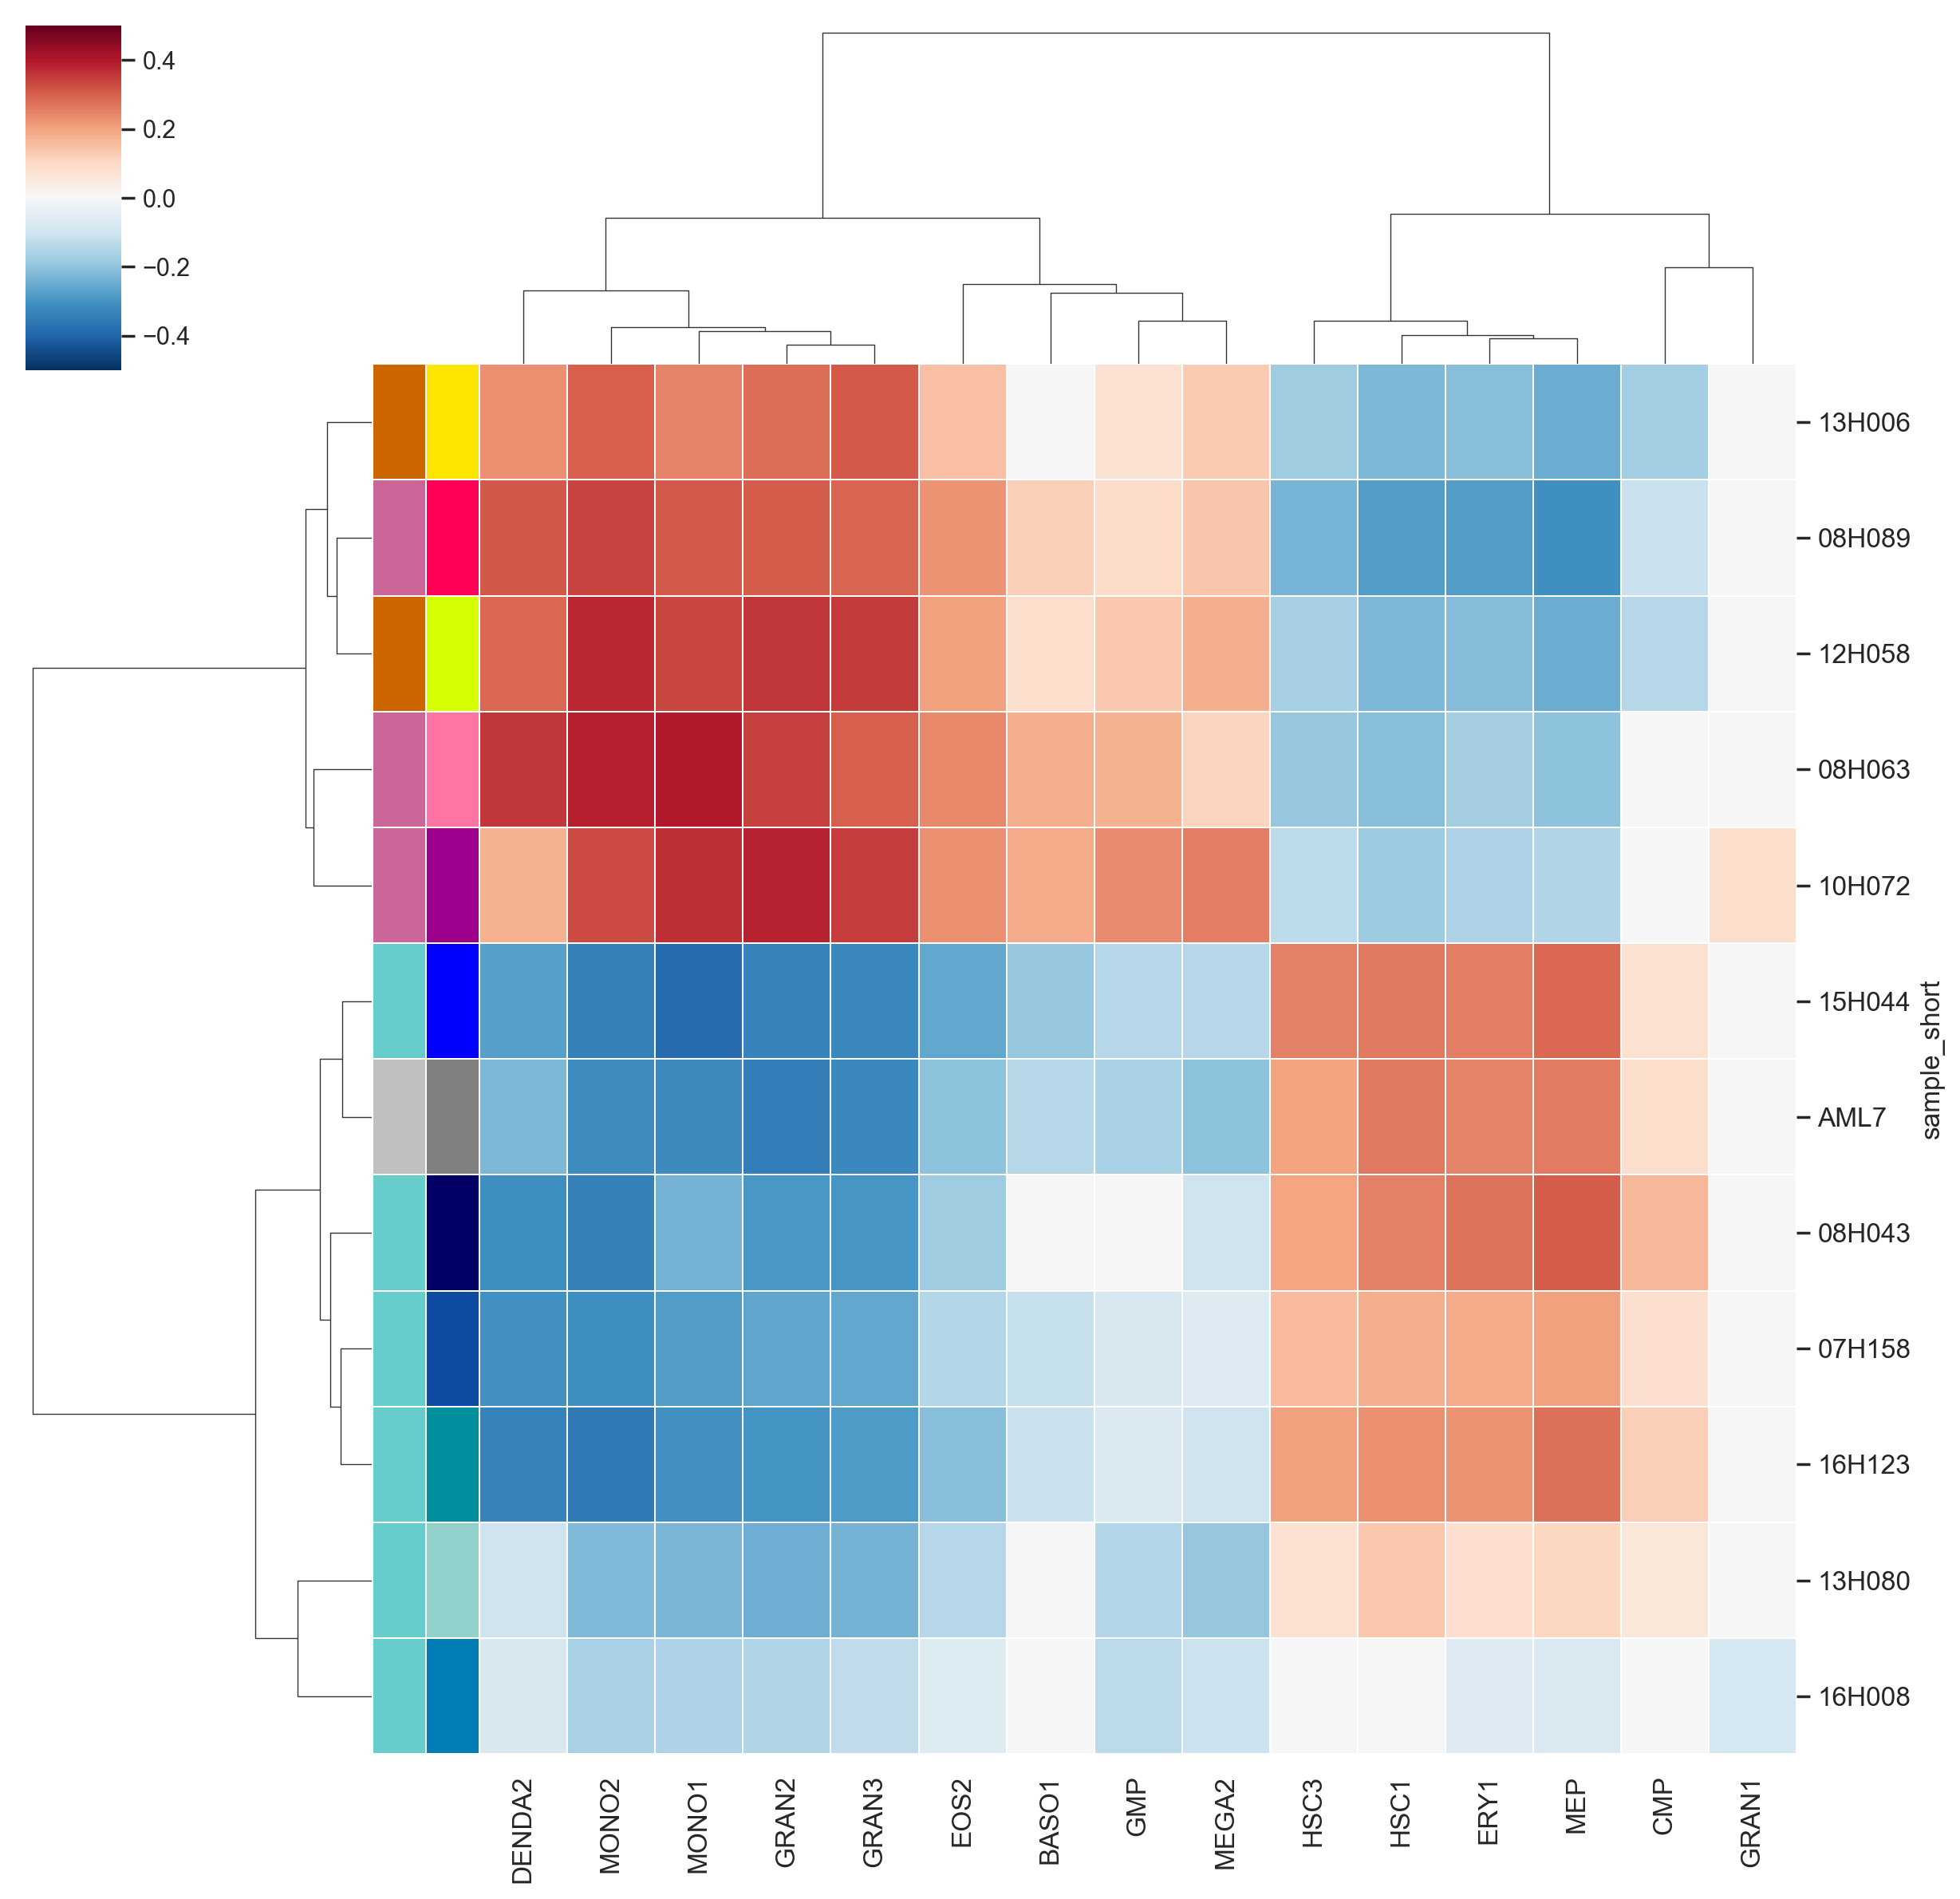

In [22]:
sns.set(font_scale=1)


pmap6=['#66CCCC', '#66CCCC',
 '#CC6699', '#CC6699', '#CC6699', 
       '#CC6600', '#CC6600',
       
 '#66CCCC', '#66CCCC', '#66CCCC', '#66CCCC', 'silver']

print(a.shape)

corrs = co_df_dmap.copy()


lut = dict(zip(corrs.index, pmap4))
col = pd.DataFrame(list(corrs.index), columns = ['community'])
col.index = col['community']
row_colors = col.community.map(lut)

lut2 = dict(zip(corrs.index, pmap6))
col2 = pd.DataFrame(list(corrs.index), columns = ['community'])
col2.index = col2['community']
row_colors2 = col2.community.map(lut2)




# Do not display unwanted values
# Convert to float
corrs_red = corrs.copy()
corrs_red = corrs_red.astype('float64') 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
cm = sns.clustermap(corrs_red, figsize=(12, 12), cmap = 'RdBu_r', 
                    row_colors = [row_colors2, row_colors],
                   vmin = -0.5, vmax = 0.5,
                    linewidths=0.05
                   )

ax = cm.ax_heatmap
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)



#### PER CLUSTER

In [23]:
adata_df_red = adata_df.loc[:,np.log(genes_std+0.01) > cut_off]
adata_df_red.index = adata.obs['PhenoGraph_clusters']
adata_df_red.head(5)

sc = adata_df_red.copy()
# group by cluster mean
sc_forcomp = sc.groupby(level=0, axis=0).mean()

#Center
sc_forcomp -= sc_forcomp.mean(axis=0)

In [24]:
# DMAP
dmap = pd.read_table('/Users/vincentlavallee/data/SKI/AnacondaProjects/Lung/DMap_data.gct', skiprows=2, parse_dates=False, index_col=[0, 1]).T
dmap.columns = dmap.columns.droplevel(0)
dmap.index = [re.sub('_\d{1,2}', '', i) for i in dmap.index]
dmap = dmap.groupby(level=0, axis=0).mean()
dmap = dmap.drop([ 'DENDA1', 'MEGA1', 'PRE_BCELL2', 'PRE_BCELL3',
 ])

In [25]:
pval = 0.0005

print("step 1, dmap")

dmap = dmap.groupby(level=0, axis=1).mean() 
expressed = sc_forcomp.columns.intersection(dmap.columns)

a = sc_forcomp[expressed]
b = dmap[expressed]


co_df = pd.DataFrame(index = sc_forcomp.index, 
                     columns = dmap.index)

pv_df = pd.DataFrame(index = sc_forcomp.index, 
                     columns = dmap.index)

# Calculate correlations and p-values
print("step 1.A")
for i in range(0,sc_forcomp.shape[0]):
    for j in range (0, dmap.shape[0]):
        co,pv = scipy.stats.pearsonr(a.iloc[i,:],b.iloc[j,:])
        co_df.iloc[i,j] = co
        pv_df.iloc[i,j] = pv

# Keep only correlations with significant p-values:
print("step 1.B")
for i in range(0,sc_forcomp.shape[0]):
    for j in range (0, dmap.shape[0]):
        if pv_df.iloc[i,j] > pval:
            co_df.iloc[i,j] = 0        
      
pv_df_dmap =  pv_df.copy()  
co_df_dmap =  co_df.copy() 

step 1, dmap
step 1.A
step 1.B


(40, 3475)


[Text(0.5, 0, 'MONO1'),
 Text(2.5, 0, 'GRAN2'),
 Text(4.5, 0, 'DENDA2'),
 Text(6.5, 0, 'NKA1'),
 Text(8.5, 0, 'MEGA2'),
 Text(10.5, 0, 'NKA4'),
 Text(12.5, 0, 'BCELLA3'),
 Text(14.5, 0, 'BCELLA1'),
 Text(16.5, 0, 'NKA2'),
 Text(18.5, 0, 'TCELLA2'),
 Text(20.5, 0, 'TCELLA3'),
 Text(22.5, 0, 'TCELLA7'),
 Text(24.5, 0, 'TCELLA8'),
 Text(26.5, 0, 'MEP'),
 Text(28.5, 0, 'HSC3'),
 Text(30.5, 0, 'ERY3'),
 Text(32.5, 0, 'CMP')]

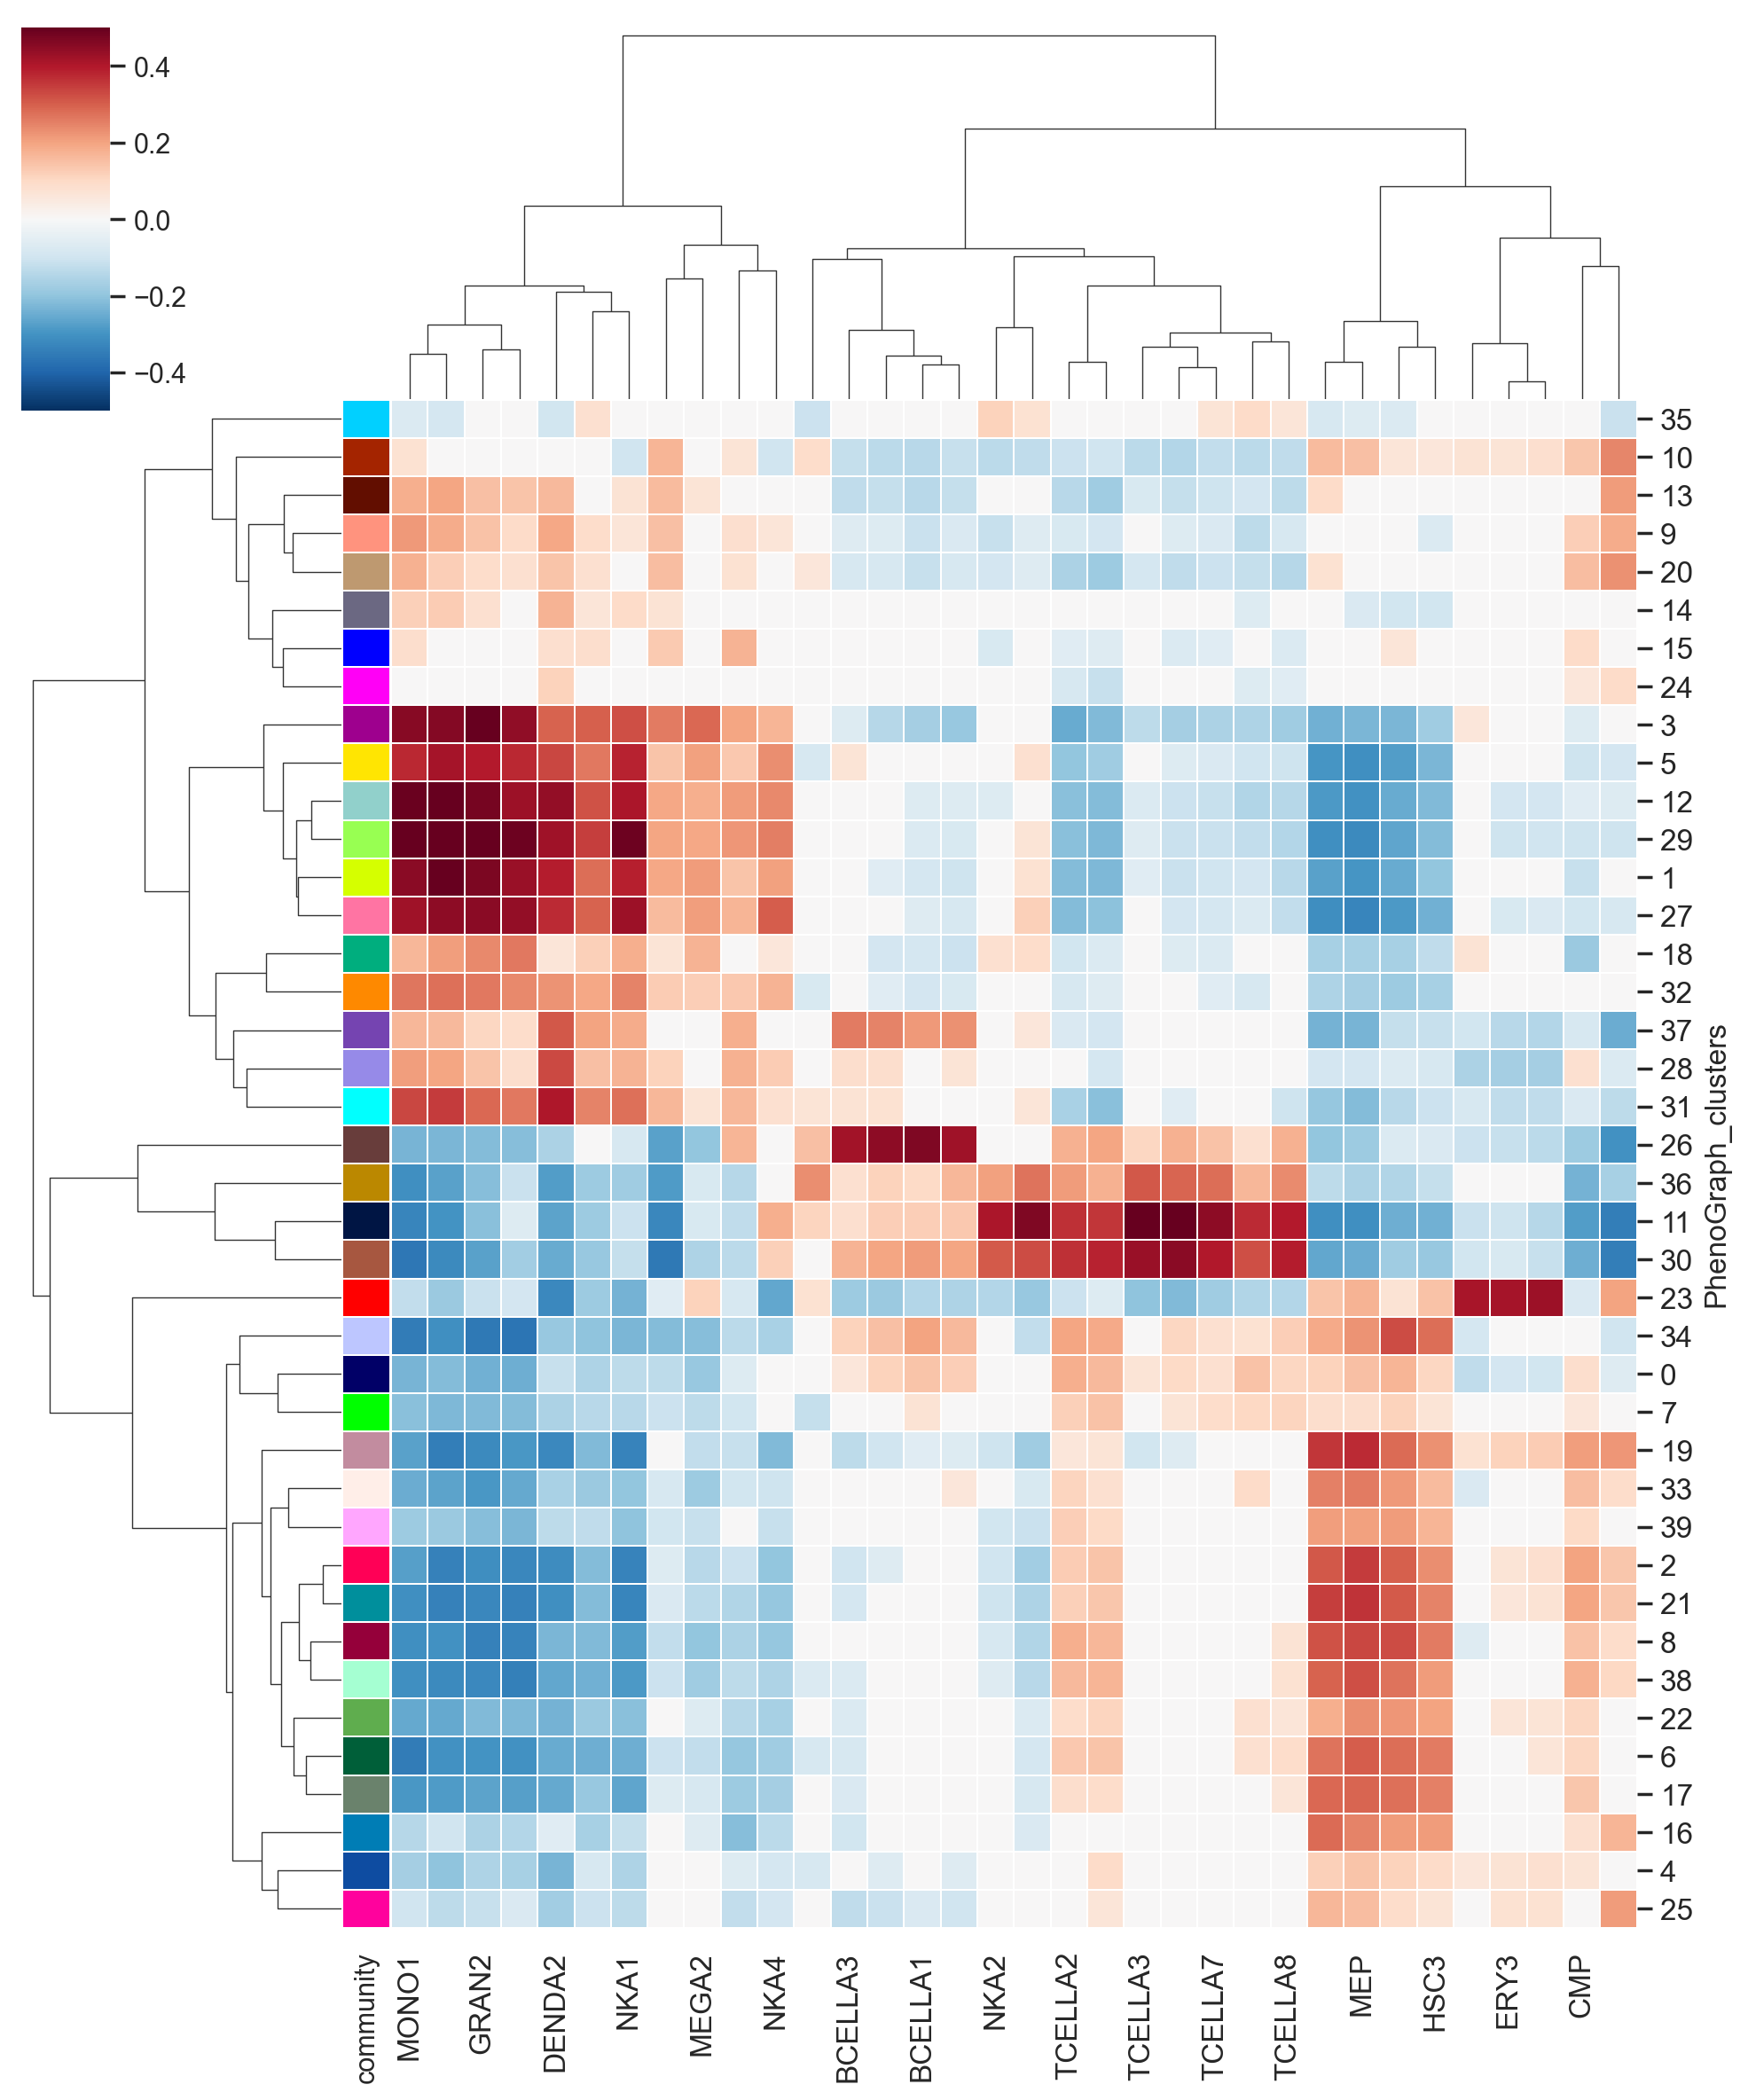

In [26]:
sns.set(font_scale=1)

print(a.shape)

corrs = co_df_dmap.copy()

lut = dict(zip(corrs.index, pmap2))
col = pd.DataFrame(list(corrs.index), columns = ['community'])
col.index = col['community']
row_colors = col.community.map(lut)


# Do not display unwanted values
# Convert to float
corrs_red = corrs.copy()
corrs_red = corrs_red.astype('float64') 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
cm = sns.clustermap(corrs_red, figsize=(10, 12), cmap = 'RdBu_r', row_colors = row_colors,
                   vmin = -0.5, vmax = 0.5,
                    linewidths=0.1
                   )

ax = cm.ax_heatmap
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)



### Euclidian distance at the pseudo bulk level

In [27]:
fab = list(adata.obs.sample_short)
fab1 = ['M5' if x in ['08H089', '10H072', '08H063'] else x for x in fab]
fab2 = ['M4' if x in ['12H058', '13H006'] else x for x in fab1]
fab3 = ['M1' if x in ['07H158', '08H043', '13H080',  '15H044',  '16H008',"16H123", ] else x for x in fab2]
fab4 = ['Other' if x in ['AML7'] else x for x in fab3]

adata.obs['fab'] = fab4
adata.obs.head(5)

,G2M_score,NPM1_mut,NPM1_wt,PhenoGraph_clusters,S_score,batch,cell_type,doublets,doublets000001,doublets00001,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,phase,sample,total_counts,sample_short,blast_cell_type,bulk_mutation,fab
index,,,,,,,,,,,,,,,,,,,,,
204911389031725_13H006_1,-0.095151,NA,NA,13,-0.018740,11,blast,0.0,0.0,0.0,...,58.738909,71.177535,33.086398,G1,13H006_1,11609.0,13H006,blast2,wildtype,M4
226901487380891_08H043_1,-0.067527,NA,wt,2,-0.089144,7,blast,0.0,0.0,0.0,...,73.998768,92.483056,46.703635,G1,08H043_1,1623.0,08H043,blast1,mutated,M1
191080743484644_13H006_1,-0.032713,NA,NA,13,0.186313,11,blast,0.0,0.0,0.0,...,59.623024,73.053842,34.003888,S,13H006_1,11831.0,13H006,blast2,wildtype,M4
205527670798637_15H044_1,-0.024814,NA,wt,6,-0.018447,6,blast,0.0,0.0,0.0,...,76.097940,84.065293,47.322192,G1,15H044_1,12865.0,15H044,blast1,mutated,M1
134600627504877_12H058_2,0.002378,NA,NA,18,-0.046522,10,blast,0.0,0.0,0.0,...,73.568484,88.914338,54.649565,G2M,12H058_2,2183.0,12H058,blast3,wildtype,M4


In [28]:
adata_df_red = adata_df.loc[:,np.log(genes_std+0.01) > cut_off]
adata_df_red.index = adata.obs['sample_short']
adata_df_red.head(5)

index,DPM1,FGR,FUCA2,BAD,LAP3,CD99,MAD1L1,LASP1,TMEM176A,M6PR,...,MRPL45,FO538757.1,AC090498.1,EBLN3P,RP1-34B20.21,ZNF521,CLC,DSCR8,HPGDS,CLDN10
sample_short,,,,,,,,,,,,,,,,,,,,,
13H006,0.880620,0.880620,0.385805,0.880620,0.663511,2.143915,0.663511,1.210151,0.0,0.385805,...,0.0,0.0,0.663511,0.0,0.0,0.0,0.0,0.880620,0.0,0.0
08H043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
13H006,0.379781,0.000000,0.654369,0.379781,1.327549,1.046567,0.000000,0.654369,0.0,0.379781,...,0.0,0.0,1.443088,0.0,0.0,0.0,0.0,0.379781,0.0,0.0
15H044,0.000000,0.000000,0.000000,0.000000,0.000000,1.807964,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.379734,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
12H058,0.000000,2.141359,0.000000,1.253809,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [29]:
# group by cluster mean
sc_forcomp = adata_df_red.groupby(level=0, axis=0).mean()

print(sc_forcomp.shape)
sc_forcomp

(12, 5278)


index,DPM1,FGR,FUCA2,BAD,LAP3,CD99,MAD1L1,LASP1,TMEM176A,M6PR,...,MRPL45,FO538757.1,AC090498.1,EBLN3P,RP1-34B20.21,ZNF521,CLC,DSCR8,HPGDS,CLDN10
sample_short,,,,,,,,,,,,,,,,,,,,,
07H158,0.083343,0.016145,0.054702,0.107495,0.076340,1.480504,0.040484,0.122676,0.008951,0.155240,...,0.083590,0.257790,1.580848,0.058274,0.372952,0.195935,0.028830,0.000000,0.001148,0.049368
08H043,0.093946,0.052388,0.049160,0.088996,0.078334,0.958162,0.050857,0.088531,0.050043,0.174695,...,0.075401,0.180316,1.328688,0.057090,0.045159,0.061838,0.079325,0.000000,0.009150,0.183140
08H063,0.132103,0.382620,0.103567,0.087843,0.269044,0.352699,0.036787,0.095238,0.406147,0.234741,...,0.076195,0.085180,1.104747,0.058361,0.010960,0.000000,0.000561,0.000000,0.000033,0.001391
08H089,0.145076,0.262275,0.070029,0.072447,0.141904,0.798728,0.063695,0.157124,0.561273,0.154702,...,0.063030,0.110955,1.160209,0.074544,0.033557,0.000085,0.000169,0.000000,0.000000,0.000000
10H072,0.108036,0.320254,0.098224,0.074699,0.150174,0.428386,0.050904,0.198787,0.158919,0.312001,...,0.051752,0.069853,0.900216,0.058104,0.007321,0.000272,0.000000,0.000000,0.000729,0.000176
12H058,0.161698,0.391791,0.155235,0.147683,0.348870,1.145994,0.116593,0.202579,0.014394,0.366541,...,0.066927,0.090638,0.423379,0.074786,0.025741,0.003096,0.000693,0.312039,0.016839,0.030642
13H006,0.172656,0.364310,0.174158,0.138297,0.364284,1.196295,0.118390,0.186854,0.011247,0.378188,...,0.075974,0.097678,0.459555,0.075394,0.022085,0.010432,0.001347,0.296698,0.062854,0.019479
13H080,0.112845,0.039258,0.070855,0.070141,0.090505,0.766157,0.038804,0.064365,0.006216,0.283595,...,0.119470,0.078042,0.542664,0.066056,0.043922,0.000123,0.011377,0.000031,0.426955,0.012988
15H044,0.101580,0.029407,0.065133,0.175072,0.092759,2.427634,0.039959,0.118028,0.012284,0.238021,...,0.111885,0.134466,1.099652,0.129687,0.190433,0.233246,0.010943,0.000000,0.001593,0.005065


In [30]:
# Calculate the distance matrix

sc_forcomp_T = sc_forcomp.T
df = pd.DataFrame(index = sc_forcomp_T.columns, columns = sc_forcomp_T.columns)

for i in range (0, sc_forcomp_T.shape[1]):
    for j in range (0, sc_forcomp_T.shape[1]):
        dist = abs(np.sum((sc_forcomp_T.iloc[:,i] - sc_forcomp_T.iloc[:,j])**2))
        df.iloc[i,j] = dist

        df  = df.astype('float64')
df  

sample_short,07H158,08H043,08H063,08H089,10H072,12H058,13H006,13H080,15H044,16H008,16H123,AML7
sample_short,,,,,,,,,,,,
07H158,0.000000,68.953888,279.349884,262.390839,191.577393,308.219330,269.238708,191.395477,90.386017,57.484802,44.675205,145.570068
08H043,68.953888,0.000000,199.100616,222.153992,142.652283,268.897583,228.959824,110.617294,98.359329,70.489838,35.796486,79.791260
08H063,279.349884,199.100616,0.000000,95.036690,101.322693,125.999001,110.707977,238.366470,265.725708,206.436523,232.559723,220.620483
08H089,262.390839,222.153992,95.036690,0.000000,103.803467,146.168381,141.875473,264.899506,264.024902,183.898773,233.631958,244.760071
10H072,191.577393,142.652283,101.322693,103.803467,0.000000,129.131943,127.930756,274.081909,237.017426,148.886627,153.403412,251.943283
12H058,308.219330,268.897583,125.999001,146.168381,129.131943,0.000000,15.165692,301.366547,289.957214,235.083008,272.740967,315.059296
13H006,269.238708,228.959824,110.707977,141.875473,127.930756,15.165692,0.000000,245.926651,241.305206,206.431290,235.649841,251.466324
13H080,191.395477,110.617294,238.366470,264.899506,274.081909,301.366547,245.926651,0.000000,150.633148,165.170807,149.062836,81.643250
15H044,90.386017,98.359329,265.725708,264.024902,237.017426,289.957214,241.305206,150.633148,0.000000,126.817352,71.753998,111.227829


/Users/vincentlavallee/venv/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


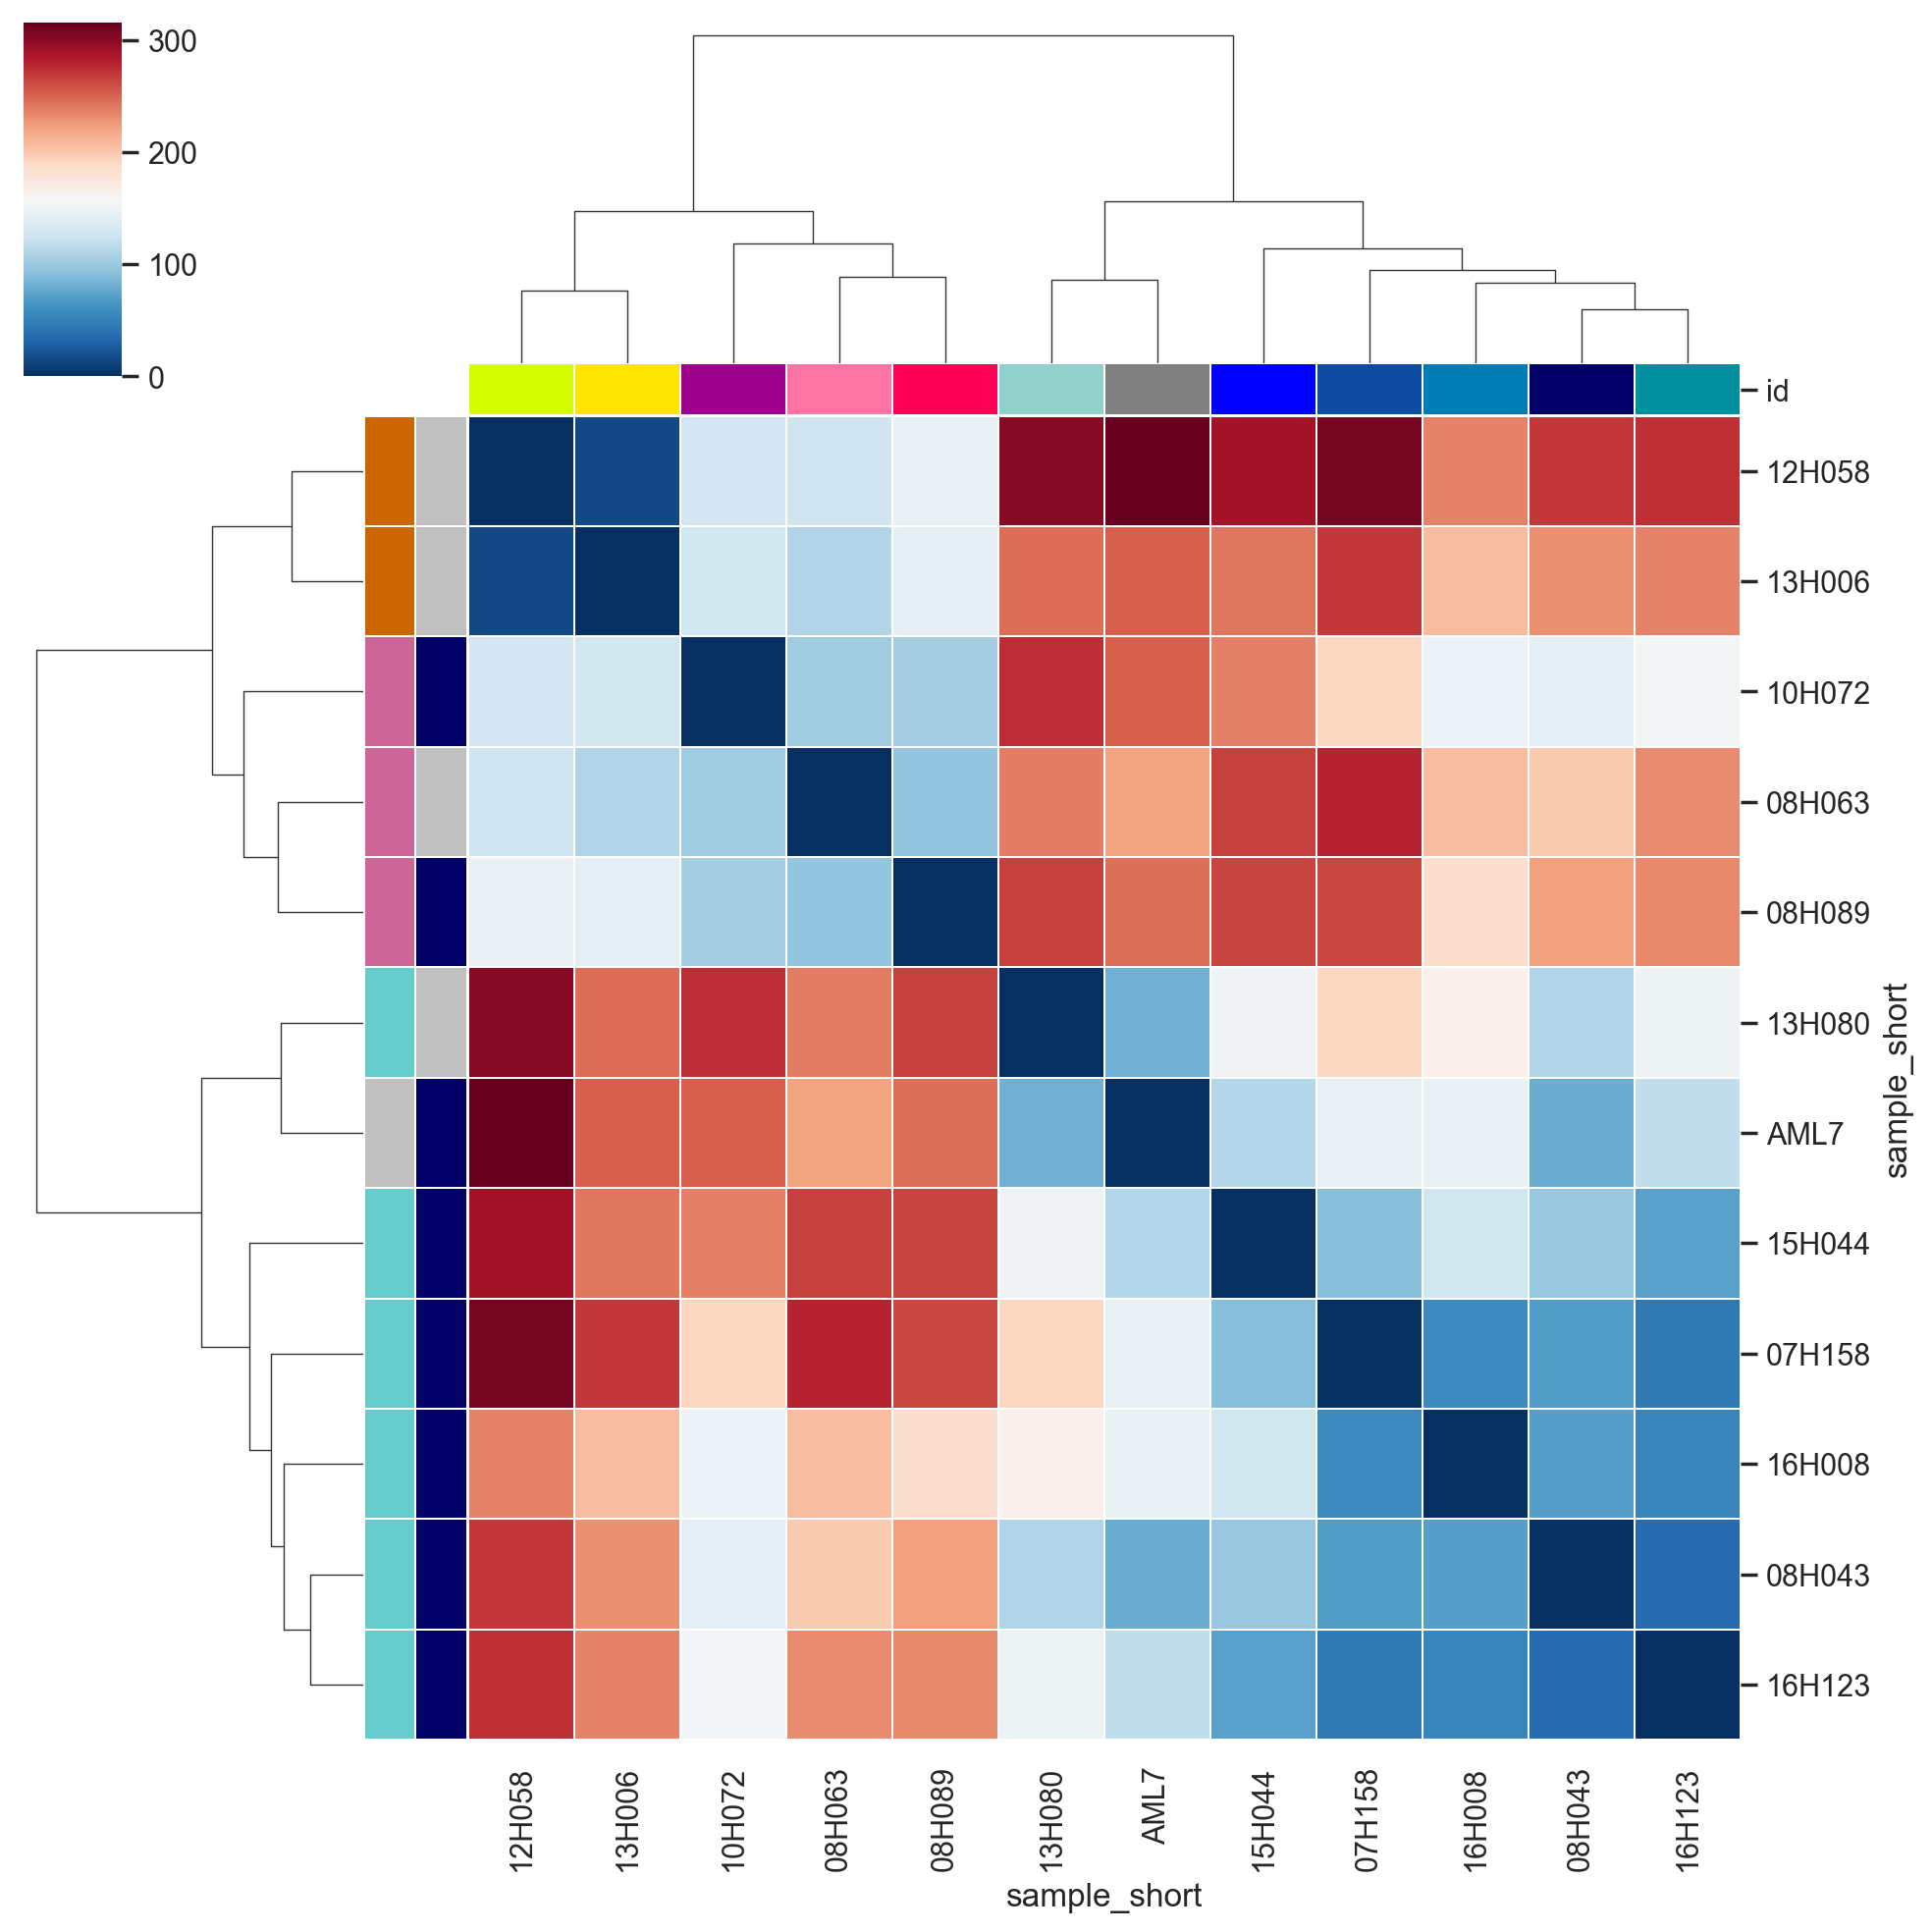

In [31]:
col = pd.DataFrame(list(sc_forcomp.index), columns = ['id'])
col.index = col['id']
row_colors = col.id.map(palette_sample)
row_colors_fab = col.id.map(palette_fab2)
row_colors_mut = col.id.map(palette_mut)

matplotlib.rcParams['figure.figsize'] = [9, 8] 
sns.clustermap(df,
               cmap = 'RdBu_r', 
               linewidths=0.05,
               row_colors =[row_colors_fab, row_colors_mut],
               col_colors = row_colors
              )

### Cell type per sample

In [32]:
adata_filtered = adata.copy()

adata_filtered.shape

(104116, 22354)

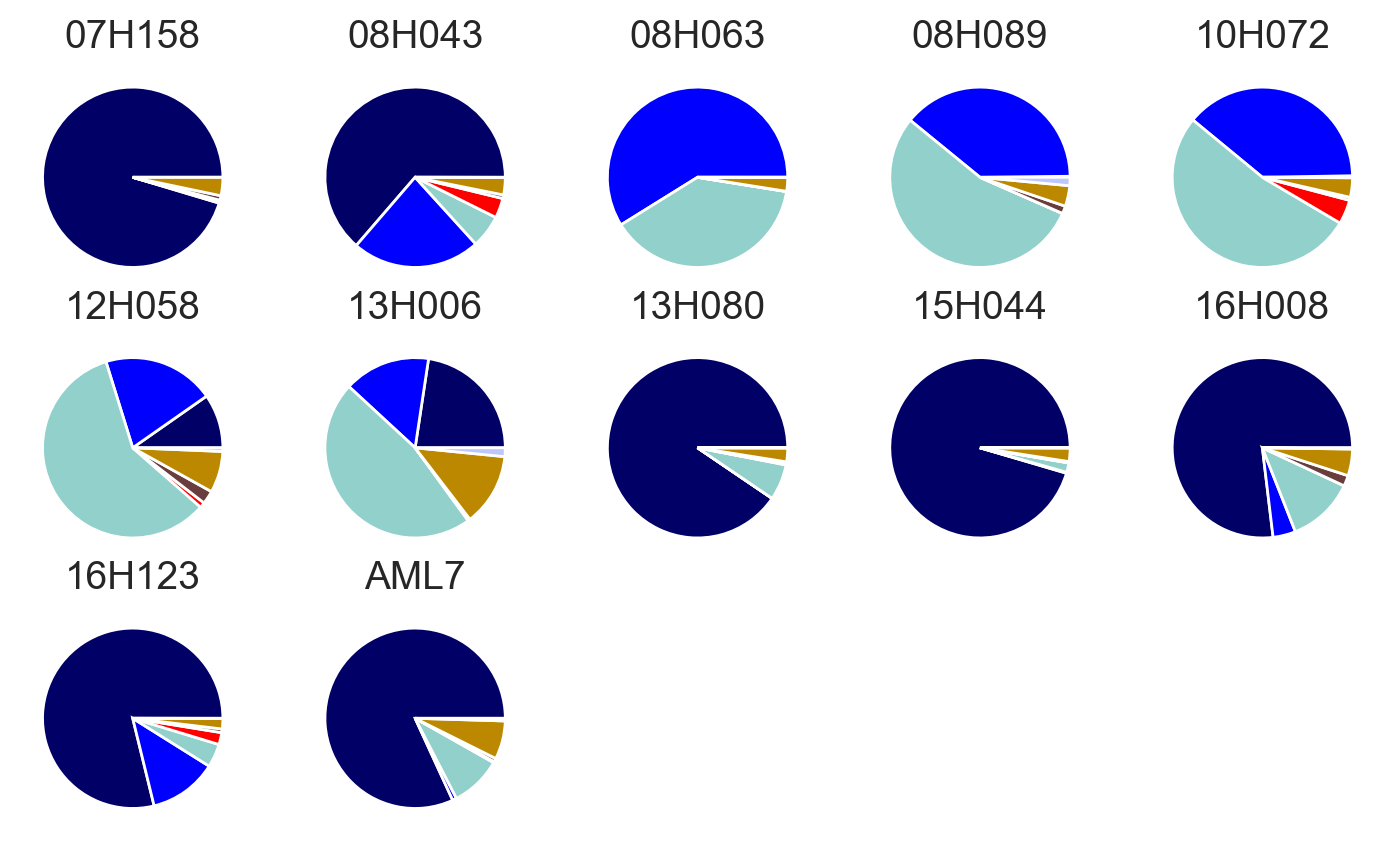

In [33]:
#sc.set_figure_params(dpi=80, frameon = None)

nrows = 10
ncols = 5
fig = plt.figure(figsize=[1.75 * ncols, 1.75*nrows])


for i, s in enumerate (np.unique(adata_filtered.obs.sample_short)):
    #print(i,s)

    ax = fig.add_subplot(nrows, ncols, i+1)

    b1ast1 = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['blast1']
    blast2 = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['blast2']
    blast3 = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['blast3']
    
    
    if 'ery' in list(adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type']):
        ery = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['ery']
    else:
        ery = 0
            
    b = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['b']
    t = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['t']
    
    if 'immature' in list(adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type']):
        immature = adata_filtered.obs.loc[adata_filtered.obs.sample_short == s,'blast_cell_type'].value_counts()['immature']
    else:
        immature = 0
    
    sizes = [b1ast1,blast2,blast3,ery,b,t,immature]
    colors = ['#010067', '#0000FF', '#91D0CB', '#FF0000', '#683D3B', '#BB8800', '#BDC6FF'  ]
    labels = b1ast1,blast2,blast3,ery,b,t,immature

    ax.pie(sizes, colors = colors,  ) #labels = labels,autopct='%1.0f%%'
    plt.title(s,  fontsize=14) # fontweight='bold'
